In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
try:
    conn = psycopg2.connect(user="cohort17",
                            password="Cohort17Movies",
                            host="moviesdb.ce8d6g1pa5lm.us-east-1.rds.amazonaws.com",
                            port="5432",database="moviesdb")

    dbquery = "select * from movies_analytical_table"
    
    df = pd.read_sql_query(dbquery, conn)

except (Exception, psycopg2.Error) as error :
    print ("Error while fetching data from PostgreSQL", error)

finally:
    if(conn):
        conn.close()

In [3]:
pd.options.display.max_columns = 999
df.dropna(subset=['domesticgross'], inplace=True)
df.head()

,id,tconst,titletype,primarytitle,originaltitle,region,isadult,startyear,endyear,runtimeminutes,genre1,genre2,genre3,nconst1,name1,category1,nconst2,name2,category2,nconst3,name3,category3,nconst4,name4,category4,nconst5,name5,category5,nconst6,name6,category6,nconst7,name7,category7,nconst8,name8,category8,mojo_title,numbers_title,keywords,keyword1,keyword2,keyword3,keyword4,keyword5,keyword6,keyword7,keyword8,keyword9,keyword10,keyword11,keyword12,keyword13,keyword14,keyword15,keyword16,keyword17,keyword18,keyword19,keyword20,keyword21,keyword22,keyword23,keyword24,keyword25,keyword26,keyword27,keyword28,keyword29,keyword30,keyword31,studio,releasedate,lifetime_gross,productionbudget,domesticgross,worldwidegross
21,426576,tt0443649,movie,"10,000 BC","10,000 BC",US,0,2008,None,109.0,Action,Adventure,Drama,nm0004741,Camilla Belle,actress,nm1711829,Steven Strait,actor,nm0434879,Marco Khan,actor,nm0193295,Cliff Curtis,actor,nm0000386,Roland Emmerich,director,nm0460057,Harald Kloser,writer,nm0330428,Mark Gordon,producer,nm1057590,Michael Wimer,producer,"10,000 B.C.","10,000 B.C.","Visual Effects, Voiceover/Narration",Visual Effects,Voiceover/Narration,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,WB,"Mar 7, 2008",94784201.0,105000000.0,94784201.0,269065678.0
69,202908,tt0211181,movie,102 Dalmatians,102 Dalmatians,US,0,2000,None,100.0,Adventure,Comedy,Family,nm0000335,Glenn Close,actress,nm0000367,Gérard Depardieu,actor,nm0344435,Ioan Gruffudd,actor,nm0262521,Alice Evans,actress,nm0510674,Kevin Lima,director,nm0807977,Dodie Smith,writer,nm0118649,Kristen Buckley,writer,nm0716391,Brian Regan,writer,102 Dalmatians,102 Dalmatians,Live Action Cartoon,Live Action Cartoon,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,BV,"Nov 22, 2000",66957026.0,85000000.0,66941559.0,66941559.0
83,1631672,tt1179933,movie,10 Cloverfield Lane,10 Cloverfield Lane,US,0,2016,None,103.0,Drama,Horror,Mystery,nm0000422,John Goodman,actor,nm0935541,Mary Elizabeth Winstead,actress,nm0302330,John Gallagher Jr.,actor,nm0341174,Douglas M. Griffin,actor,nm0870469,Dan Trachtenberg,director,nm1061091,Josh Campbell,writer,nm1173295,Matthew Stuecken,writer,nm3227090,Damien Chazelle,writer,10 Cloverfield Lane,10 Cloverfield Lane,"Kidnap, Post Apocalypse, Escape, Survivalist, ...",Kidnap,Post Apocalypse,Escape,Survivalist,Car Accident,One Location,Secret Sequel,Isolation Horror,Psychological Thriller,IMAX: DMR,,,,,,,,,,,,,,,,,,,,,,Par.,"Jan 4, 2016",72082998.0,5000000.0,72082999.0,108286422.0
85,3229141,tt3453052,movie,10 Days in a Madhouse,10 Days in a Madhouse,US,0,2015,None,111.0,Drama,,,nm3551591,Caroline Barry,actress,nm0000483,Christopher Lambert,actor,nm0001456,Kelly LeBrock,actress,nm0030404,Julia Chantrey,actress,nm0385725,Timothy Hines,director,nm1024391,Susan Goforth,producer,nm2559683,Andrew Malcolm,producer,nm0928862,Martin Wiley,producer,10 Days in a Madhouse,10 Days in a Madhouse,"Mental Illness, Mental Hospital, Investigative...",Mental Illness,Mental Hospital,Investigative Journalist,1880s,,,,,,,,,,,,,,,,,,,,,,,,,,,,CafeP,"Nov 11, 2015",14616.0,12000000.0,14616.0,14616.0
105,345838,tt0360323,movie,10th & Wolf,10th & Wolf,US,0,2006,None,107.0,Crime,Drama,Thriller,nm0005188,James Marsden,actor,nm0000610,Giovanni Ribisi,actor,nm0000605,Brad Renfro,actor,nm0005305,Piper Perabo,actress,nm0604263,Bobby Moresco,director,nm0824481,Allan Steele,writer,nm0216560,Suzanne DeLaurentiis,producer,nm0614410,Joseph D. Murphy,producer,10th & Wolf,10th & Wolf,Mafia,Mafia,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Think,"Aug 18, 2006",54702.0,8000000.0,54702.0,143782.0


In [152]:
df.describe()

,id,isadult,startyear,runtimeminutes,lifetime_gross,productionbudget,domesticgross,worldwidegross
count,2.901000e+03,2901.0,2901.000000,2890.000000,2.538000e+03,2.901000e+03,2.901000e+03,2.901000e+03
mean,1.472915e+06,0.0,2009.238538,106.938408,5.995865e+07,4.418916e+07,5.682463e+07,1.294116e+08
std,1.272011e+06,0.0,5.497489,18.106193,7.973883e+07,5.016885e+07,7.881089e+07,2.138014e+08
min,1.159480e+05,0.0,2000.000000,15.000000,4.230000e+02,7.000000e+03,0.000000e+00,0.000000e+00
25%,3.512770e+05,0.0,2005.000000,94.000000,1.228843e+07,1.000000e+07,8.677425e+06,1.371947e+07
50%,9.645440e+05,0.0,2009.000000,104.000000,3.421925e+07,2.750000e+07,3.200030e+07,5.548983e+07
75%,2.302583e+06,0.0,2014.000000,117.000000,7.444169e+07,6.000000e+07,7.027889e+07,1.492281e+08
max,5.766976e+06,0.0,2020.000000,219.000000,8.583730e+08,4.250000e+08,8.583730e+08,2.795473e+09


(array([1.025e+03, 4.950e+02, 3.810e+02, 2.620e+02, 1.610e+02, 1.120e+02,
        8.900e+01, 6.900e+01, 4.900e+01, 4.700e+01, 4.200e+01, 2.300e+01,
        2.300e+01, 1.800e+01, 1.300e+01, 1.300e+01, 8.000e+00, 9.000e+00,
        9.000e+00, 1.200e+01, 5.000e+00, 6.000e+00, 4.000e+00, 7.000e+00,
        5.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.0000000e+00, 1.7167460e+07, 3.4334920e+07, 5.1502380e+07,
        6.8669840e+07, 8.5837300e+07, 1.0300476e+08, 1.2017222e+08,
        1.3733968e+08, 1.5450714e+08, 1.7167460e+08, 1.8884206e+08,
        2.0600952e+08, 2.2317698e+08, 2.4034444e+08, 2.5751190e+08,
        2.7467936e+08, 2.9184682e+08, 3.0901428e+08, 3.2618174e+08,
        3.4334920e+08, 3.6051666e+08

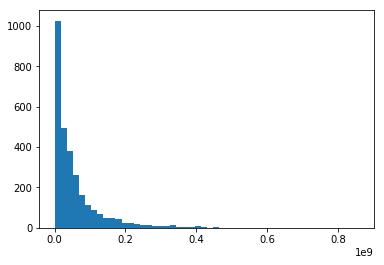

In [153]:
plt.hist(df['domesticgross'], bins=50)

In [154]:
df['name1'].value_counts()

Nicolas Cage           24
Adam Sandler           22
Mark Wahlberg          21
Denzel Washington      21
Matt Damon             19
George Clooney         19
Dwayne Johnson         18
Ben Stiller            18
Will Smith             17
Robert De Niro         17
Ben Affleck            17
Will Ferrell           17
Bruce Willis           17
Steve Carell           15
Tom Cruise             15
Johnny Depp            15
Tom Hanks              15
Keanu Reeves           14
Vin Diesel             14
Jason Statham          14
Leonardo DiCaprio      14
Jake Gyllenhaal        13
Christian Bale         13
Reese Witherspoon      13
Matthew McConaughey    13
Robert Downey Jr.      13
Owen Wilson            12
Ice Cube               12
Sandra Bullock         12
Brad Pitt              12
                       ..
Keegan-Michael Key      1
Ahnaise Christmas       1
Todd Bagley             1
Matt Czuchry            1
Matthew Macfadyen       1
Timothy Olyphant        1
Claude Duhamel          1
Sarah Drew  

In [155]:
df['category1'].value_counts()

actor              2040
actress             797
self                 56
archive_footage       4
director              4
Name: category1, dtype: int64

In [156]:
df['name2'].value_counts()

Owen Wilson             13
Samuel L. Jackson       12
Aaron Eckhart           10
Cate Blanchett          10
Jude Law                 9
Drew Barrymore           9
Anne Hathaway            9
Gerard Butler            9
Jamie Foxx               9
Joel Edgerton            8
Julianne Moore           8
Penélope Cruz            8
Matt Damon               8
Elizabeth Banks          8
Rose Byrne               8
Jennifer Aniston         8
Meryl Streep             7
Jessica Alba             7
Robert De Niro           7
Charlize Theron          7
Cameron Diaz             7
Peter Sarsgaard          7
Colin Farrell            7
Rachel Weisz             7
Kate Winslet             7
Morgan Freeman           7
Kristen Wiig             7
Vince Vaughn             7
Anthony Hopkins          7
Benicio Del Toro         6
                        ..
James Spader             1
Cole Sprouse             1
Carrie-Anne Moss         1
Jeffrey Wright           1
Rob Paulsen              1
Jonathan Rhys Meyers     1
K

In [157]:
df['category2'].value_counts()

actor              1654
actress            1177
self                 53
archive_footage       7
director              5
archive_sound         1
producer              1
Name: category2, dtype: int64

In [158]:
df['name3'].value_counts()

John Goodman               11
Mark Ruffalo                9
Morgan Freeman              9
Scarlett Johansson          8
Willem Dafoe                7
Rosario Dawson              7
Liam Neeson                 6
Benjamin Bratt              6
Chris Evans                 6
Patricia Clarkson           6
Catherine Keener            6
Rachel McAdams              6
Woody Harrelson             6
Jennifer Garner             6
Olivia Wilde                6
Dan Fogler                  6
Naomi Watts                 5
Jude Law                    5
Amy Adams                   5
Jennifer Connelly           5
Susan Sarandon              5
Dwayne Johnson              5
Maria Bello                 5
Josh Brolin                 5
Jonah Hill                  5
Selma Blair                 5
Harrison Ford               5
Marisa Tomei                5
Anna Kendrick               5
Kerry Washington            5
                           ..
Anil Raman                  1
Alan Rickman                1
Charles He

In [159]:
df['category3'].value_counts()

actor              1724
actress            1110
self                 49
archive_footage       6
director              3
producer              3
composer              2
Name: category3, dtype: int64

In [160]:
df['name4'].value_counts()

Amanda Peet             7
Christopher Plummer     6
Stanley Tucci           6
Loretta Devine          6
Abigail Breslin         5
Cate Blanchett          5
Catherine Keener        5
Alec Baldwin            5
Viola Davis             5
Woody Harrelson         5
Ralph Fiennes           5
Jessica Alba            5
Danny Huston            5
Jordi Mollà             5
Jason Clarke            5
Taye Diggs              5
Jim Broadbent           5
Ben Kingsley            5
Vincent D'Onofrio       5
Michael Caine           5
Ciarán Hinds            5
James Marsden           5
Jeffrey Wright          5
Kimberly Elise          4
Anthony Mackie          4
Toni Collette           4
Eric Christian Olsen    4
Teresa Palmer           4
Robert Patrick          4
Mark Strong             4
                       ..
Doug Hutchison          1
Jonathan Rhys Meyers    1
Dana Ivey               1
Bam Margera             1
Dustin Milligan         1
Manolo Cardona          1
Karl Glusman            1
Mauricio Gar

In [161]:
df['category4'].value_counts()

actor              1792
actress            1034
self                 52
archive_footage       7
composer              5
producer              3
director              2
cinematographer       1
Name: category4, dtype: int64

In [162]:
df['name5'].value_counts()

Steven Soderbergh                   15
Steven Spielberg                    13
Ron Howard                          12
Ridley Scott                        12
Clint Eastwood                      11
Shawn Levy                          11
Martin Scorsese                      9
Christopher Nolan                    9
M. Night Shyamalan                   9
Todd Phillips                        9
Tim Burton                           9
Michael Bay                          9
Marc Forster                         8
Antoine Fuqua                        8
David Gordon Green                   8
Guy Ritchie                          8
Peter Jackson                        8
Bobby Farrelly                       8
Peter Berg                           8
Malcolm D. Lee                       8
Rob Cohen                            8
Adam Shankman                        8
Francis Lawrence                     7
Peter Segal                          7
Jaume Collet-Serra                   7
F. Gary Gray             

In [163]:
df['category5'].value_counts()

director           2768
writer               71
producer             42
composer              7
editor                2
cinematographer       1
Name: category5, dtype: int64

In [164]:
df['name6'].value_counts()

Ehren Kruger           10
Peter Farrelly          9
Letty Aronson           8
Judd Apatow             8
Joel Coen               8
Tim Bevan               8
Jason Blum              7
Barry Mendel            7
Brian Helgeland         6
Richard Wenk            6
Joe Russo               6
Phil Hay                6
Aline Brosh McKenna     6
Fran Walsh              6
Mark Bomback            6
Allan Loeb              6
John Logan              5
Charles Leavitt         5
William Monahan         5
Chris Morgan            5
Luc Besson              5
David Koepp             5
Roberto Orci            5
Fred Wolf               5
Mike Rich               5
Aaron Zigman            5
Nicholas Stoller        5
Susannah Grant          5
Rhett Reese             5
Eric Heisserer          5
                       ..
Anthony Yerkovich       1
Andy Stock              1
Michael D. Weiss        1
Sam Dolnick             1
Ethan Canin             1
Habib Faisal            1
Jennie Snyder Urman     1
Jeff Shaara 

In [165]:
df['category6'].value_counts()

writer             2150
producer            457
director            217
composer             43
cinematographer      16
editor                3
actor                 2
Name: category6, dtype: int64

In [166]:
df['name7'].value_counts()

Jason Blum                18
Neal H. Moritz             8
Eric Fellner               8
Tim Bevan                  7
Mark Gordon                7
Brian Grazer               7
Todd Black                 7
Peter Safran               6
Philippa Boyens            6
Matt Manfredi              6
Scott Rudin                6
Dede Gardner               6
Gary Lucchesi              6
Judd Apatow                6
Bruce Davey                5
Christopher Markus         5
Cinco Paul                 5
Stephenie Meyer            5
Anthony Bregman            5
Paul Wernick               5
Clayton Townsend           5
Robert Mark Kamen          5
Akiva Goldsman             5
Alex Kurtzman              5
Matt Alvarez               4
John August                4
John Gatins                4
Jerry Bruckheimer          4
Barry Bernardi             4
Scott Stuber               4
                          ..
Alan Mak                   1
William Rose               1
David Friedkin             1
John Guy      

In [167]:
df['category7'].value_counts()

writer                 1580
producer               1059
composer                151
cinematographer          46
director                 22
editor                   17
actor                     7
production_designer       1
Name: category7, dtype: int64

In [168]:
df['name8'].value_counts()

Neal H. Moritz            11
Lorenzo di Bonaventura    10
Brian Grazer              10
Scott Rudin               10
John Davis                 9
Jack Giarraputo            9
Wyck Godfrey               8
Randall Emmett             8
Sidney Kimmel              8
James Newton Howard        8
Marc Abraham               7
Tim Bevan                  7
Chris Moore                7
Michael Barnathan          7
Peter Abrams               6
Jason Blum                 6
Peter Chernin              6
Marty Bowen                6
Marco Beltrami             6
Gary Barber                6
Marcelo Zarvos             6
Scott Stuber               6
Broderick Johnson          6
Eric Fellner               6
John Debney                6
Mark Canton                5
Michael London             5
David Hoberman             5
Lucy Fisher                5
Nira Park                  5
                          ..
Brenden Patrick Hill       1
Andrew Mogel               1
Marty Katz                 1
Dave Parker   

In [169]:
df['category8'].value_counts()

producer               1475
writer                  860
composer                323
cinematographer         138
editor                   37
production_designer      12
actor                     9
director                  4
actress                   3
Name: category8, dtype: int64

In [170]:
df.head()

,id,tconst,titletype,primarytitle,originaltitle,region,isadult,startyear,endyear,runtimeminutes,genre1,genre2,genre3,nconst1,name1,category1,nconst2,name2,category2,nconst3,name3,category3,nconst4,name4,category4,nconst5,name5,category5,nconst6,name6,category6,nconst7,name7,category7,nconst8,name8,category8,mojo_title,numbers_title,keywords,keyword1,keyword2,keyword3,keyword4,keyword5,keyword6,keyword7,keyword8,keyword9,keyword10,keyword11,keyword12,keyword13,keyword14,keyword15,keyword16,keyword17,keyword18,keyword19,keyword20,keyword21,keyword22,keyword23,keyword24,keyword25,keyword26,keyword27,keyword28,keyword29,keyword30,keyword31,studio,releasedate,lifetime_gross,productionbudget,domesticgross,worldwidegross
21,426576,tt0443649,movie,"10,000 BC","10,000 BC",US,0,2008,None,109.0,Action,Adventure,Drama,nm0004741,Camilla Belle,actress,nm1711829,Steven Strait,actor,nm0434879,Marco Khan,actor,nm0193295,Cliff Curtis,actor,nm0000386,Roland Emmerich,director,nm0460057,Harald Kloser,writer,nm0330428,Mark Gordon,producer,nm1057590,Michael Wimer,producer,"10,000 B.C.","10,000 B.C.","Visual Effects, Voiceover/Narration",Visual Effects,Voiceover/Narration,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,WB,"Mar 7, 2008",94784201.0,105000000.0,94784201.0,269065678.0
69,202908,tt0211181,movie,102 Dalmatians,102 Dalmatians,US,0,2000,None,100.0,Adventure,Comedy,Family,nm0000335,Glenn Close,actress,nm0000367,Gérard Depardieu,actor,nm0344435,Ioan Gruffudd,actor,nm0262521,Alice Evans,actress,nm0510674,Kevin Lima,director,nm0807977,Dodie Smith,writer,nm0118649,Kristen Buckley,writer,nm0716391,Brian Regan,writer,102 Dalmatians,102 Dalmatians,Live Action Cartoon,Live Action Cartoon,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,BV,"Nov 22, 2000",66957026.0,85000000.0,66941559.0,66941559.0
83,1631672,tt1179933,movie,10 Cloverfield Lane,10 Cloverfield Lane,US,0,2016,None,103.0,Drama,Horror,Mystery,nm0000422,John Goodman,actor,nm0935541,Mary Elizabeth Winstead,actress,nm0302330,John Gallagher Jr.,actor,nm0341174,Douglas M. Griffin,actor,nm0870469,Dan Trachtenberg,director,nm1061091,Josh Campbell,writer,nm1173295,Matthew Stuecken,writer,nm3227090,Damien Chazelle,writer,10 Cloverfield Lane,10 Cloverfield Lane,"Kidnap, Post Apocalypse, Escape, Survivalist, ...",Kidnap,Post Apocalypse,Escape,Survivalist,Car Accident,One Location,Secret Sequel,Isolation Horror,Psychological Thriller,IMAX: DMR,,,,,,,,,,,,,,,,,,,,,,Par.,"Jan 4, 2016",72082998.0,5000000.0,72082999.0,108286422.0
85,3229141,tt3453052,movie,10 Days in a Madhouse,10 Days in a Madhouse,US,0,2015,None,111.0,Drama,,,nm3551591,Caroline Barry,actress,nm0000483,Christopher Lambert,actor,nm0001456,Kelly LeBrock,actress,nm0030404,Julia Chantrey,actress,nm0385725,Timothy Hines,director,nm1024391,Susan Goforth,producer,nm2559683,Andrew Malcolm,producer,nm0928862,Martin Wiley,producer,10 Days in a Madhouse,10 Days in a Madhouse,"Mental Illness, Mental Hospital, Investigative...",Mental Illness,Mental Hospital,Investigative Journalist,1880s,,,,,,,,,,,,,,,,,,,,,,,,,,,,CafeP,"Nov 11, 2015",14616.0,12000000.0,14616.0,14616.0
105,345838,tt0360323,movie,10th & Wolf,10th & Wolf,US,0,2006,None,107.0,Crime,Drama,Thriller,nm0005188,James Marsden,actor,nm0000610,Giovanni Ribisi,actor,nm0000605,Brad Renfro,actor,nm0005305,Piper Perabo,actress,nm0604263,Bobby Moresco,director,nm0824481,Allan Steele,writer,nm0216560,Suzanne DeLaurentiis,producer,nm0614410,Joseph D. Murphy,producer,10th & Wolf,10th & Wolf,Mafia,Mafia,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Think,"Aug 18, 2006",54702.0,8000000.0,54702.0,143782.0


In [171]:
#Missing Value Ratio: VICTORIA 
#Import library 
import numpy as np
df.isnull().sum()/len(df)*100

id                    0.000000
tconst                0.000000
titletype             0.000000
primarytitle          0.000000
originaltitle         0.000000
region                0.000000
isadult               0.000000
startyear             0.000000
endyear             100.000000
runtimeminutes        0.379180
genre1                0.034471
genre2                0.034471
genre3                0.034471
nconst1               0.000000
name1                 0.000000
category1             0.000000
nconst2               0.103413
name2                 0.103413
category2             0.103413
nconst3               0.137883
name3                 0.137883
category3             0.137883
nconst4               0.172354
name4                 0.172354
category4             0.172354
nconst5               0.344709
name5                 0.344709
category5             0.344709
nconst6               0.448121
name6                 0.448121
                       ...    
keyword8              5.515340
keyword9

In [5]:
def drop_col(dataframe,threshold):
    for column in dataframe:
        pct_pop = dataframe[column].sum()/dataframe[column].count()
        
        if pct_pop < threshold:
            dataframe.drop(column, axis=1, inplace=True)

#for num in range(1,8):
#    "name{}".format(num) + "_dummies" = pd.get_dummies(df["name{}".format(num)], prefix="name{}".format(num))
    
name1_dummies = pd.get_dummies(df['name1'], prefix='name1')
name2_dummies = pd.get_dummies(df['name2'], prefix='name2')
name3_dummies = pd.get_dummies(df['name3'], prefix='name3')
name4_dummies = pd.get_dummies(df['name4'], prefix='name4')
name5_dummies = pd.get_dummies(df['name5'], prefix='name5')
name6_dummies = pd.get_dummies(df['name6'], prefix='name6')
name7_dummies = pd.get_dummies(df['name7'], prefix='name7')
name8_dummies = pd.get_dummies(df['name8'], prefix='name8')

drop_col(name1_dummies,.0034)
drop_col(name2_dummies,.0025)

#for num in range(3,8):
#    drop_col("name{}".format(num) + "_dummies",.0018)
    
drop_col(name3_dummies,.0018)
drop_col(name4_dummies,.0018)
drop_col(name5_dummies,.0018)
drop_col(name6_dummies,.0018)
drop_col(name7_dummies,.0018)
drop_col(name8_dummies,.0018)

#for num in range(1,8):
#    df = pd.concat([df,"name{}".format(num) + "_dummies"], axis=1)
df = pd.concat([df,name1_dummies,name2_dummies,name3_dummies,name4_dummies,name5_dummies,name6_dummies,name7_dummies,name8_dummies],axis=1)

#for num in range(1,8):
#    df.drop(["name{}".format(num),"category{}".format(num)], axis=1, inplace=True)
df.drop(['name1','category1','name2','category2','name3','category3','name4','category4','name5','category5','name6','category6','name7','category7','name8','category8'], axis=1, inplace=True)


In [6]:
df.head()

,id,tconst,titletype,primarytitle,originaltitle,region,isadult,startyear,endyear,runtimeminutes,genre1,genre2,genre3,nconst1,nconst2,nconst3,nconst4,nconst5,nconst6,nconst7,nconst8,mojo_title,numbers_title,keywords,keyword1,keyword2,keyword3,keyword4,keyword5,keyword6,keyword7,keyword8,keyword9,keyword10,keyword11,keyword12,keyword13,keyword14,keyword15,keyword16,keyword17,keyword18,keyword19,keyword20,keyword21,keyword22,keyword23,keyword24,keyword25,keyword26,keyword27,keyword28,keyword29,keyword30,keyword31,studio,releasedate,lifetime_gross,productionbudget,domesticgross,worldwidegross,name1_Adam Sandler,name1_Ben Affleck,name1_Ben Stiller,name1_Brad Pitt,name1_Bruce Willis,name1_Channing Tatum,name1_Christian Bale,name1_Colin Farrell,name1_Denzel Washington,name1_Dwayne Johnson,name1_Eddie Murphy,name1_George Clooney,name1_Gerard Butler,name1_Hugh Jackman,name1_Ice Cube,name1_Jack Black,name1_Jackie Chan,name1_Jake Gyllenhaal,name1_Jason Statham,name1_Jim Carrey,name1_Johnny Depp,name1_Keanu Reeves,name1_Leonardo DiCaprio,name1_Mark Wahlberg,name1_Matt Damon,name1_Matthew McConaughey,name1_Milla Jovovich,name1_Nicolas Cage,name1_Owen Wilson,name1_Reese Witherspoon,name1_Robert De Niro,name1_Robert Downey Jr.,name1_Russell Crowe,name1_Samuel L. Jackson,name1_Sandra Bullock,name1_Steve Carell,name1_Tom Cruise,name1_Tom Hanks,name1_Vin Diesel,name1_Will Ferrell,name1_Will Smith,name2_Aaron Eckhart,name2_Anne Hathaway,name2_Cate Blanchett,name2_Drew Barrymore,name2_Elizabeth Banks,name2_Gerard Butler,name2_Jamie Foxx,name2_Jennifer Aniston,name2_Joel Edgerton,name2_Jude Law,name2_Julianne Moore,name2_Matt Damon,name2_Owen Wilson,name2_Penélope Cruz,name2_Rose Byrne,name2_Samuel L. Jackson,name3_Benjamin Bratt,name3_Catherine Keener,name3_Chris Evans,name3_Dan Fogler,name3_Jennifer Garner,name3_John Goodman,name3_Liam Neeson,name3_Mark Ruffalo,name3_Morgan Freeman,name3_Olivia Wilde,name3_Patricia Clarkson,name3_Rachel McAdams,name3_Rosario Dawson,name3_Scarlett Johansson,name3_Willem Dafoe,name3_Woody Harrelson,name4_Amanda Peet,name4_Christopher Plummer,name4_Loretta Devine,name4_Stanley Tucci,name5_Adam McKay,name5_Adam Shankman,name5_Andy Fickman,name5_Anthony Russo,name5_Antoine Fuqua,name5_Barry Levinson,name5_Bill Condon,name5_Bobby Farrelly,name5_Brett Ratner,name5_Bryan Singer,name5_Catherine Hardwicke,name5_Christopher Nolan,name5_Clint Eastwood,name5_D.J. Caruso,name5_Darren Aronofsky,name5_David Ayer,name5_David Fincher,name5_David Gordon Green,name5_David O. Russell,name5_Dennis Dugan,name5_Ethan Coen,name5_F. Gary Gray,name5_Francis Lawrence,name5_Frank Coraci,name5_Guy Ritchie,name5_James Mangold,name5_James Wan,name5_Jaume Collet-Serra,name5_Joe Wright,name5_Jon M. Chu,name5_Judd Apatow,name5_Kevin Smith,name5_M. Night Shyamalan,name5_Malcolm D. Lee,name5_Marc Forster,name5_Martin Campbell,name5_Martin Scorsese,name5_McG,name5_Michael Bay,name5_Nicholas Stoller,name5_Paul Feig,name5_Paul Greengrass,name5_Paul W.S. Anderson,name5_Peter Berg,name5_Peter Jackson,name5_Peter Segal,name5_Raja Gosnell,name5_Renny Harlin,name5_Reuben Cannon,name5_Richard Linklater,name5_Ridley Scott,name5_Rob Cohen,name5_Rob Marshall,name5_Robert Luketic,name5_Robert Rodriguez,name5_Robert Zemeckis,name5_Roland Emmerich,name5_Ron Howard,name5_Sam Mendes,name5_Sam Raimi,name5_Shawn Levy,name5_Simon West,name5_Spike Lee,name5_Steve Carr,name5_Steven Soderbergh,name5_Steven Spielberg,name5_Tim Burton,name5_Tim Story,name5_Todd Phillips,name5_Woody Allen,name5_Zack Snyder,name6_Aline Brosh McKenna,name6_Allan Loeb,name6_Barry Mendel,name6_Brian Helgeland,name6_Ehren Kruger,name6_Fran Walsh,name6_Jason Blum,name6_Joe Russo,name6_Joel Coen,name6_Judd Apatow,name6_Letty Aronson,name6_Mark Bomback,name6_Peter Farrelly,name6_Phil Hay,name6_Richard Wenk,name6_Tim Bevan,name7_Brian Grazer,name7_Dede Gardner,name7_Eric Fellner,name7_Gary Lucchesi,name7_Jason Blum,name7_Judd Apatow,name7_Mark Gordon,name7_Matt Manfredi,name7_Neal H. Moritz,name7_Pe

In [142]:
df.drop(['region','isadult','endyear','nconst1','nconst2','nconst3','nconst4','nconst5','nconst6','nconst7','nconst8'], axis=1, inplace=True)

In [174]:
df.drop(['id','tconst','titletype','originaltitle','mojo_title','numbers_title','lifetime_gross','worldwidegross'],axis=1,inplace=True)

In [175]:
df.head()

,primarytitle,region,isadult,startyear,endyear,runtimeminutes,genre1,genre2,genre3,nconst1,nconst2,nconst3,nconst4,nconst5,nconst6,nconst7,nconst8,keywords,keyword1,keyword2,keyword3,keyword4,keyword5,keyword6,keyword7,keyword8,keyword9,keyword10,keyword11,keyword12,keyword13,keyword14,keyword15,keyword16,keyword17,keyword18,keyword19,keyword20,keyword21,keyword22,keyword23,keyword24,keyword25,keyword26,keyword27,keyword28,keyword29,keyword30,keyword31,studio,releasedate,productionbudget,domesticgross,name1_Adam Sandler,name1_Ben Affleck,name1_Ben Stiller,name1_Brad Pitt,name1_Bruce Willis,name1_Channing Tatum,name1_Christian Bale,name1_Colin Farrell,name1_Denzel Washington,name1_Dwayne Johnson,name1_Eddie Murphy,name1_George Clooney,name1_Gerard Butler,name1_Hugh Jackman,name1_Ice Cube,name1_Jack Black,name1_Jackie Chan,name1_Jake Gyllenhaal,name1_Jason Statham,name1_Jim Carrey,name1_Johnny Depp,name1_Keanu Reeves,name1_Leonardo DiCaprio,name1_Mark Wahlberg,name1_Matt Damon,name1_Matthew McConaughey,name1_Milla Jovovich,name1_Nicolas Cage,name1_Owen Wilson,name1_Reese Witherspoon,name1_Robert De Niro,name1_Robert Downey Jr.,name1_Russell Crowe,name1_Samuel L. Jackson,name1_Sandra Bullock,name1_Steve Carell,name1_Tom Cruise,name1_Tom Hanks,name1_Vin Diesel,name1_Will Ferrell,name1_Will Smith,name2_Aaron Eckhart,name2_Anne Hathaway,name2_Cate Blanchett,name2_Drew Barrymore,name2_Elizabeth Banks,name2_Gerard Butler,name2_Jamie Foxx,name2_Jennifer Aniston,name2_Joel Edgerton,name2_Jude Law,name2_Julianne Moore,name2_Matt Damon,name2_Owen Wilson,name2_Penélope Cruz,name2_Rose Byrne,name2_Samuel L. Jackson,name3_Benjamin Bratt,name3_Catherine Keener,name3_Chris Evans,name3_Dan Fogler,name3_Jennifer Garner,name3_John Goodman,name3_Liam Neeson,name3_Mark Ruffalo,name3_Morgan Freeman,name3_Olivia Wilde,name3_Patricia Clarkson,name3_Rachel McAdams,name3_Rosario Dawson,name3_Scarlett Johansson,name3_Willem Dafoe,name3_Woody Harrelson,name4_Amanda Peet,name4_Christopher Plummer,name4_Loretta Devine,name4_Stanley Tucci,name5_Adam McKay,name5_Adam Shankman,name5_Andy Fickman,name5_Anthony Russo,name5_Antoine Fuqua,name5_Barry Levinson,name5_Bill Condon,name5_Bobby Farrelly,name5_Brett Ratner,name5_Bryan Singer,name5_Catherine Hardwicke,name5_Christopher Nolan,name5_Clint Eastwood,name5_D.J. Caruso,name5_Darren Aronofsky,name5_David Ayer,name5_David Fincher,name5_David Gordon Green,name5_David O. Russell,name5_Dennis Dugan,name5_Ethan Coen,name5_F. Gary Gray,name5_Francis Lawrence,name5_Frank Coraci,name5_Guy Ritchie,name5_James Mangold,name5_James Wan,name5_Jaume Collet-Serra,name5_Joe Wright,name5_Jon M. Chu,name5_Judd Apatow,name5_Kevin Smith,name5_M. Night Shyamalan,name5_Malcolm D. Lee,name5_Marc Forster,name5_Martin Campbell,name5_Martin Scorsese,name5_McG,name5_Michael Bay,name5_Nicholas Stoller,name5_Paul Feig,name5_Paul Greengrass,name5_Paul W.S. Anderson,name5_Peter Berg,name5_Peter Jackson,name5_Peter Segal,name5_Raja Gosnell,name5_Renny Harlin,name5_Reuben Cannon,name5_Richard Linklater,name5_Ridley Scott,name5_Rob Cohen,name5_Rob Marshall,name5_Robert Luketic,name5_Robert Rodriguez,name5_Robert Zemeckis,name5_Roland Emmerich,name5_Ron Howard,name5_Sam Mendes,name5_Sam Raimi,name5_Shawn Levy,name5_Simon West,name5_Spike Lee,name5_Steve Carr,name5_Steven Soderbergh,name5_Steven Spielberg,name5_Tim Burton,name5_Tim Story,name5_Todd Phillips,name5_Woody Allen,name5_Zack Snyder,name6_Aline Brosh McKenna,name6_Allan Loeb,name6_Barry Mendel,name6_Brian Helgeland,name6_Ehren Kruger,name6_Fran Walsh,name6_Jason Blum,name6_Joe Russo,name6_Joel Coen,name6_Judd Apatow,name6_Letty Aronson,name6_Mark Bomback,name6_Peter Farrelly,name6_Phil Hay,name6_Richard Wenk,name6_Tim Bevan,name7_Brian Grazer,name7_Dede Gardner,name7_Eric Fellner,name7_Gary Lucchesi,name7_Jason Blum,name7_Judd Apatow,name7_Mark Gordon,name7_Matt Manfredi,name7_Neal H. Moritz,name7_Peter Safran,name7_Philippa Boyens,name7_Scott Rudin,name7_Tim Bevan,name7_Todd Black,name8

In [176]:
df.describe()

,isadult,startyear,runtimeminutes,productionbudget,domesticgross,name1_Adam Sandler,name1_Ben Affleck,name1_Ben Stiller,name1_Brad Pitt,name1_Bruce Willis,name1_Channing Tatum,name1_Christian Bale,name1_Colin Farrell,name1_Denzel Washington,name1_Dwayne Johnson,name1_Eddie Murphy,name1_George Clooney,name1_Gerard Butler,name1_Hugh Jackman,name1_Ice Cube,name1_Jack Black,name1_Jackie Chan,name1_Jake Gyllenhaal,name1_Jason Statham,name1_Jim Carrey,name1_Johnny Depp,name1_Keanu Reeves,name1_Leonardo DiCaprio,name1_Mark Wahlberg,name1_Matt Damon,name1_Matthew McConaughey,name1_Milla Jovovich,name1_Nicolas Cage,name1_Owen Wilson,name1_Reese Witherspoon,name1_Robert De Niro,name1_Robert Downey Jr.,name1_Russell Crowe,name1_Samuel L. Jackson,name1_Sandra Bullock,name1_Steve Carell,name1_Tom Cruise,name1_Tom Hanks,name1_Vin Diesel,name1_Will Ferrell,name1_Will Smith,name2_Aaron Eckhart,name2_Anne Hathaway,name2_Cate Blanchett,name2_Drew Barrymore,name2_Elizabeth Banks,name2_Gerard Butler,name2_Jamie Foxx,name2_Jennifer Aniston,name2_Joel Edgerton,name2_Jude Law,name2_Julianne Moore,name2_Matt Damon,name2_Owen Wilson,name2_Penélope Cruz,name2_Rose Byrne,name2_Samuel L. Jackson,name3_Benjamin Bratt,name3_Catherine Keener,name3_Chris Evans,name3_Dan Fogler,name3_Jennifer Garner,name3_John Goodman,name3_Liam Neeson,name3_Mark Ruffalo,name3_Morgan Freeman,name3_Olivia Wilde,name3_Patricia Clarkson,name3_Rachel McAdams,name3_Rosario Dawson,name3_Scarlett Johansson,name3_Willem Dafoe,name3_Woody Harrelson,name4_Amanda Peet,name4_Christopher Plummer,name4_Loretta Devine,name4_Stanley Tucci,name5_Adam McKay,name5_Adam Shankman,name5_Andy Fickman,name5_Anthony Russo,name5_Antoine Fuqua,name5_Barry Levinson,name5_Bill Condon,name5_Bobby Farrelly,name5_Brett Ratner,name5_Bryan Singer,name5_Catherine Hardwicke,name5_Christopher Nolan,name5_Clint Eastwood,name5_D.J. Caruso,name5_Darren Aronofsky,name5_David Ayer,name5_David Fincher,name5_David Gordon Green,name5_David O. Russell,name5_Dennis Dugan,name5_Ethan Coen,name5_F. Gary Gray,name5_Francis Lawrence,name5_Frank Coraci,name5_Guy Ritchie,name5_James Mangold,name5_James Wan,name5_Jaume Collet-Serra,name5_Joe Wright,name5_Jon M. Chu,name5_Judd Apatow,name5_Kevin Smith,name5_M. Night Shyamalan,name5_Malcolm D. Lee,name5_Marc Forster,name5_Martin Campbell,name5_Martin Scorsese,name5_McG,name5_Michael Bay,name5_Nicholas Stoller,name5_Paul Feig,name5_Paul Greengrass,name5_Paul W.S. Anderson,name5_Peter Berg,name5_Peter Jackson,name5_Peter Segal,name5_Raja Gosnell,name5_Renny Harlin,name5_Reuben Cannon,name5_Richard Linklater,name5_Ridley Scott,name5_Rob Cohen,name5_Rob Marshall,name5_Robert Luketic,name5_Robert Rodriguez,name5_Robert Zemeckis,name5_Roland Emmerich,name5_Ron Howard,name5_Sam Mendes,name5_Sam Raimi,name5_Shawn Levy,name5_Simon West,name5_Spike Lee,name5_Steve Carr,name5_Steven Soderbergh,name5_Steven Spielberg,name5_Tim Burton,name5_Tim Story,name5_Todd Phillips,name5_Woody Allen,name5_Zack Snyder,name6_Aline Brosh McKenna,name6_Allan Loeb,name6_Barry Mendel,name6_Brian Helgeland,name6_Ehren Kruger,name6_Fran Walsh,name6_Jason Blum,name6_Joe Russo,name6_Joel Coen,name6_Judd Apatow,name6_Letty Aronson,name6_Mark Bomback,name6_Peter Farrelly,name6_Phil Hay,name6_Richard Wenk,name6_Tim Bevan,name7_Brian Grazer,name7_Dede Gardner,name7_Eric Fellner,name7_Gary Lucchesi,name7_Jason Blum,name7_Judd Apatow,name7_Mark Gordon,name7_Matt Manfredi,name7_Neal H. Moritz,name7_Peter Safran,name7_Philippa Boyens,name7_Scott Rudin,name7_Tim Bevan,name7_Todd Black,name8_Brian Grazer,name8_Broderick Johnson,name8_Chris Moore,name8_Eric Fellner,name8_Gary Barber,name8_Jack Giarraputo,name8_James Newton Howard,name8_Jason Blum,name8_John Davis,name8_John Debney,name8_Lorenzo di Bonaventura,name8_Marc Abraham,name8_Marcelo Zarvos,name8_Marco Beltrami,name8_Marty Bowen,name8_Michael Barnathan,name8_Neal H. Moritz,name8_Peter Abrams,name8_Peter Chernin,name8_Randall Emmett,name8_Scott Rudin,name8_Scott Stuber

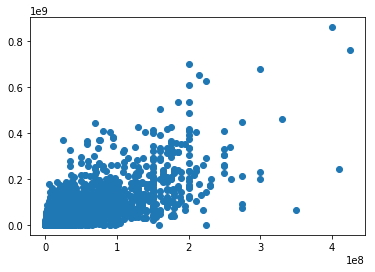

In [177]:
plt.scatter(df['productionbudget'],df['domesticgross'])

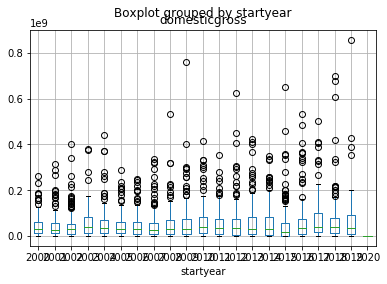

In [178]:
df.boxplot(column='domesticgross',by='startyear')

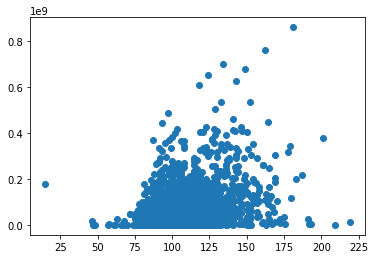

In [179]:
plt.scatter(df['runtimeminutes'],df['domesticgross'])

In [180]:
df['genre1'].value_counts()

Comedy         773
Action         772
Drama          465
Adventure      274
Biography      184
Horror         163
Crime          152
Documentary     52
Animation       28
Mystery         13
Fantasy         10
Family           5
Romance          3
Thriller         2
Sci-Fi           2
Musical          1
Music            1
Name: genre1, dtype: int64

In [181]:
df['genre2'].value_counts()

Drama          666
Adventure      332
               294
Crime          252
Romance        221
Comedy         209
Mystery        147
Animation      134
Thriller       129
Family          93
Horror          91
Fantasy         87
Sci-Fi          64
Music           62
Sport           33
History         22
Biography       19
Documentary     18
Musical         10
War              9
Western          7
News             1
Name: genre2, dtype: int64

In [182]:
df['genre3'].value_counts()

               1022
Thriller        326
Romance         243
Drama           226
Comedy          177
Sci-Fi          155
Fantasy         148
Family          115
Mystery         105
Crime            84
Sport            54
Music            52
History          50
Horror           48
Animation        30
War              27
Musical          14
Western          11
Biography         6
Documentary       6
News              1
Name: genre3, dtype: int64

In [4]:
genre1_dummies = pd.get_dummies(df['genre1'], prefix='genre1')
genre2_dummies = pd.get_dummies(df['genre2'], prefix='genre2')
genre3_dummies = pd.get_dummies(df['genre3'], prefix='genre3')

drop_col(genre1_dummies,.018)
drop_col(genre2_dummies,.018)
drop_col(genre3_dummies,.018)

df = pd.concat([df,genre1_dummies,genre2_dummies,genre3_dummies],axis=1)

df.drop(['genre1','genre2','genre3'], axis=1, inplace=True)


NameError: name 'drop_col' is not defined

In [93]:
df.describe()

,startyear,runtimeminutes,productionbudget,domesticgross,name1_Adam Sandler,name1_Ben Affleck,name1_Ben Stiller,name1_Brad Pitt,name1_Bruce Willis,name1_Channing Tatum,name1_Christian Bale,name1_Colin Farrell,name1_Denzel Washington,name1_Dwayne Johnson,name1_Eddie Murphy,name1_George Clooney,name1_Gerard Butler,name1_Hugh Jackman,name1_Ice Cube,name1_Jack Black,name1_Jackie Chan,name1_Jake Gyllenhaal,name1_Jason Statham,name1_Jim Carrey,name1_Johnny Depp,name1_Keanu Reeves,name1_Leonardo DiCaprio,name1_Mark Wahlberg,name1_Matt Damon,name1_Matthew McConaughey,name1_Milla Jovovich,name1_Nicolas Cage,name1_Owen Wilson,name1_Reese Witherspoon,name1_Robert De Niro,name1_Robert Downey Jr.,name1_Russell Crowe,name1_Samuel L. Jackson,name1_Sandra Bullock,name1_Steve Carell,name1_Tom Cruise,name1_Tom Hanks,name1_Vin Diesel,name1_Will Ferrell,name1_Will Smith,name2_Aaron Eckhart,name2_Anne Hathaway,name2_Cate Blanchett,name2_Drew Barrymore,name2_Elizabeth Banks,name2_Gerard Butler,name2_Jamie Foxx,name2_Jennifer Aniston,name2_Joel Edgerton,name2_Jude Law,name2_Julianne Moore,name2_Matt Damon,name2_Owen Wilson,name2_Penélope Cruz,name2_Rose Byrne,name2_Samuel L. Jackson,name3_Benjamin Bratt,name3_Catherine Keener,name3_Chris Evans,name3_Dan Fogler,name3_Jennifer Garner,name3_John Goodman,name3_Liam Neeson,name3_Mark Ruffalo,name3_Morgan Freeman,name3_Olivia Wilde,name3_Patricia Clarkson,name3_Rachel McAdams,name3_Rosario Dawson,name3_Scarlett Johansson,name3_Willem Dafoe,name3_Woody Harrelson,name4_Amanda Peet,name4_Christopher Plummer,name4_Loretta Devine,name4_Stanley Tucci,name5_Adam McKay,name5_Adam Shankman,name5_Andy Fickman,name5_Anthony Russo,name5_Antoine Fuqua,name5_Barry Levinson,name5_Bill Condon,name5_Bobby Farrelly,name5_Brett Ratner,name5_Bryan Singer,name5_Catherine Hardwicke,name5_Christopher Nolan,name5_Clint Eastwood,name5_D.J. Caruso,name5_Darren Aronofsky,name5_David Ayer,name5_David Fincher,name5_David Gordon Green,name5_David O. Russell,name5_Dennis Dugan,name5_Ethan Coen,name5_F. Gary Gray,name5_Francis Lawrence,name5_Frank Coraci,name5_Guy Ritchie,name5_James Mangold,name5_James Wan,name5_Jaume Collet-Serra,name5_Joe Wright,name5_Jon M. Chu,name5_Judd Apatow,name5_Kevin Smith,name5_M. Night Shyamalan,name5_Malcolm D. Lee,name5_Marc Forster,name5_Martin Campbell,name5_Martin Scorsese,name5_McG,name5_Michael Bay,name5_Nicholas Stoller,name5_Paul Feig,name5_Paul Greengrass,name5_Paul W.S. Anderson,name5_Peter Berg,name5_Peter Jackson,name5_Peter Segal,name5_Raja Gosnell,name5_Renny Harlin,name5_Reuben Cannon,name5_Richard Linklater,name5_Ridley Scott,name5_Rob Cohen,name5_Rob Marshall,name5_Robert Luketic,name5_Robert Rodriguez,name5_Robert Zemeckis,name5_Roland Emmerich,name5_Ron Howard,name5_Sam Mendes,name5_Sam Raimi,name5_Shawn Levy,name5_Simon West,name5_Spike Lee,name5_Steve Carr,name5_Steven Soderbergh,name5_Steven Spielberg,name5_Tim Burton,name5_Tim Story,name5_Todd Phillips,name5_Woody Allen,name5_Zack Snyder,name6_Aline Brosh McKenna,name6_Allan Loeb,name6_Barry Mendel,name6_Brian Helgeland,name6_Ehren Kruger,name6_Fran Walsh,name6_Jason Blum,name6_Joe Russo,name6_Joel Coen,name6_Judd Apatow,name6_Letty Aronson,name6_Mark Bomback,name6_Peter Farrelly,name6_Phil Hay,name6_Richard Wenk,name6_Tim Bevan,name7_Brian Grazer,name7_Dede Gardner,name7_Eric Fellner,name7_Gary Lucchesi,name7_Jason Blum,name7_Judd Apatow,name7_Mark Gordon,name7_Matt Manfredi,name7_Neal H. Moritz,name7_Peter Safran,name7_Philippa Boyens,name7_Scott Rudin,name7_Tim Bevan,name7_Todd Black,name8_Brian Grazer,name8_Broderick Johnson,name8_Chris Moore,name8_Eric Fellner,name8_Gary Barber,name8_Jack Giarraputo,name8_James Newton Howard,name8_Jason Blum,name8_John Davis,name8_John Debney,name8_Lorenzo di Bonaventura,name8_Marc Abraham,name8_Marcelo Zarvos,name8_Marco Beltrami,name8_Marty Bowen,name8_Michael Barnathan,name8_Neal H. Moritz,name8_Peter Abrams,name8_Peter Chernin,name8_Randall Emmett,name8_Scott Rudin,name8_Scott Stuber,name8_S

In [94]:
df.groupby(['genre1_Comedy','genre1_Action','genre1_Drama','genre1_Adventure','genre1_Biography','genre1_Horror','genre1_Crime'])['domesticgross'].mean()

genre1_Comedy  genre1_Action  genre1_Drama  genre1_Adventure  genre1_Biography  genre1_Horror  genre1_Crime
0              0              0             0                 0                 0              0               4.369465e+07
                                                                                               1               3.361786e+07
                                                                                1              0               3.807280e+07
                                                              1                 0              0               4.015461e+07
                                            1                 0                 0              0               1.064376e+08
                              1             0                 0                 0              0               3.170365e+07
               1              0             0                 0                 0              0               8.557355e+07
1              0        

In [95]:
df.head()

,primarytitle,startyear,runtimeminutes,keywords,keyword1,keyword2,keyword3,keyword4,keyword5,keyword6,keyword7,keyword8,keyword9,keyword10,keyword11,keyword12,keyword13,keyword14,keyword15,keyword16,keyword17,keyword18,keyword19,keyword20,keyword21,keyword22,keyword23,keyword24,keyword25,keyword26,keyword27,keyword28,keyword29,keyword30,keyword31,studio,releasedate,productionbudget,domesticgross,name1_Adam Sandler,name1_Ben Affleck,name1_Ben Stiller,name1_Brad Pitt,name1_Bruce Willis,name1_Channing Tatum,name1_Christian Bale,name1_Colin Farrell,name1_Denzel Washington,name1_Dwayne Johnson,name1_Eddie Murphy,name1_George Clooney,name1_Gerard Butler,name1_Hugh Jackman,name1_Ice Cube,name1_Jack Black,name1_Jackie Chan,name1_Jake Gyllenhaal,name1_Jason Statham,name1_Jim Carrey,name1_Johnny Depp,name1_Keanu Reeves,name1_Leonardo DiCaprio,name1_Mark Wahlberg,name1_Matt Damon,name1_Matthew McConaughey,name1_Milla Jovovich,name1_Nicolas Cage,name1_Owen Wilson,name1_Reese Witherspoon,name1_Robert De Niro,name1_Robert Downey Jr.,name1_Russell Crowe,name1_Samuel L. Jackson,name1_Sandra Bullock,name1_Steve Carell,name1_Tom Cruise,name1_Tom Hanks,name1_Vin Diesel,name1_Will Ferrell,name1_Will Smith,name2_Aaron Eckhart,name2_Anne Hathaway,name2_Cate Blanchett,name2_Drew Barrymore,name2_Elizabeth Banks,name2_Gerard Butler,name2_Jamie Foxx,name2_Jennifer Aniston,name2_Joel Edgerton,name2_Jude Law,name2_Julianne Moore,name2_Matt Damon,name2_Owen Wilson,name2_Penélope Cruz,name2_Rose Byrne,name2_Samuel L. Jackson,name3_Benjamin Bratt,name3_Catherine Keener,name3_Chris Evans,name3_Dan Fogler,name3_Jennifer Garner,name3_John Goodman,name3_Liam Neeson,name3_Mark Ruffalo,name3_Morgan Freeman,name3_Olivia Wilde,name3_Patricia Clarkson,name3_Rachel McAdams,name3_Rosario Dawson,name3_Scarlett Johansson,name3_Willem Dafoe,name3_Woody Harrelson,name4_Amanda Peet,name4_Christopher Plummer,name4_Loretta Devine,name4_Stanley Tucci,name5_Adam McKay,name5_Adam Shankman,name5_Andy Fickman,name5_Anthony Russo,name5_Antoine Fuqua,name5_Barry Levinson,name5_Bill Condon,name5_Bobby Farrelly,name5_Brett Ratner,name5_Bryan Singer,name5_Catherine Hardwicke,name5_Christopher Nolan,name5_Clint Eastwood,name5_D.J. Caruso,name5_Darren Aronofsky,name5_David Ayer,name5_David Fincher,name5_David Gordon Green,name5_David O. Russell,name5_Dennis Dugan,name5_Ethan Coen,name5_F. Gary Gray,name5_Francis Lawrence,name5_Frank Coraci,name5_Guy Ritchie,name5_James Mangold,name5_James Wan,name5_Jaume Collet-Serra,name5_Joe Wright,name5_Jon M. Chu,name5_Judd Apatow,name5_Kevin Smith,name5_M. Night Shyamalan,name5_Malcolm D. Lee,name5_Marc Forster,name5_Martin Campbell,name5_Martin Scorsese,name5_McG,name5_Michael Bay,name5_Nicholas Stoller,name5_Paul Feig,name5_Paul Greengrass,name5_Paul W.S. Anderson,name5_Peter Berg,name5_Peter Jackson,name5_Peter Segal,name5_Raja Gosnell,name5_Renny Harlin,name5_Reuben Cannon,name5_Richard Linklater,name5_Ridley Scott,name5_Rob Cohen,name5_Rob Marshall,name5_Robert Luketic,name5_Robert Rodriguez,name5_Robert Zemeckis,name5_Roland Emmerich,name5_Ron Howard,name5_Sam Mendes,name5_Sam Raimi,name5_Shawn Levy,name5_Simon West,name5_Spike Lee,name5_Steve Carr,name5_Steven Soderbergh,name5_Steven Spielberg,name5_Tim Burton,name5_Tim Story,name5_Todd Phillips,name5_Woody Allen,name5_Zack Snyder,name6_Aline Brosh McKenna,name6_Allan Loeb,name6_Barry Mendel,name6_Brian Helgeland,name6_Ehren Kruger,name6_Fran Walsh,name6_Jason Blum,name6_Joe Russo,name6_Joel Coen,name6_Judd Apatow,name6_Letty Aronson,name6_Mark Bomback,name6_Peter Farrelly,name6_Phil Hay,name6_Richard Wenk,name6_Tim Bevan,name7_Brian Grazer,name7_Dede Gardner,name7_Eric Fellner,name7_Gary Lucchesi,name7_Jason Blum,name7_Judd Apatow,name7_Mark Gordon,name7_Matt Manfredi,name7_Neal H. Moritz,name7_Peter Safran,name7_Philippa Boyens,name7_Scott Rudin,name7_Tim Bevan,name7_Todd Black,name8_Brian Grazer,name8_Broderick Johnson,name8_Chris Moore,name8_Eric Fellner,name8_Gary Barber,name8_Jack Giar

In [96]:
df['keyword5'].value_counts()

                                     1525
 3-D                                   30
 Dysfunctional Family                  28
 Romance                               27
 IMAX: DMR                             21
 Ensemble                              20
 Non-Chronological                     16
 Surprise Twist                        14
 Visual Effects                        14
 Voiceover/Narration                   13
 Relationships Gone Wrong              13
 Prologue                              13
 Revenge                               12
 Biography                             11
 Organized Crime                       11
 Intertitle                            11
 Screenplay Written By the Star        10
 Motion Capture Performance            10
 3-D - Shot in 3-D                     10
 Coming of Age                          8
 Mental Illness                         8
 Remake                                 8
 Gratuitous Cameos                      8
 African-American                 

In [97]:
df['keyword3'].value_counts()

                                      1107
 Romance                                53
 Dysfunctional Family                   38
 Revenge                                26
 Relationships Gone Wrong               17
 War                                    17
 Animal Lead                            16
 Visual Effects                         16
 Surprise Twist                         15
 Rescue                                 15
 3-D                                    15
 Coming of Age                          15
 IMAX: DMR                              15
 Organized Crime                        14
 African-American                       14
 Road Trip                              14
 Gangs                                  14
 Non-Chronological                      13
 Musicians                              13
 Voiceover/Narration                    12
 Fugitive / On the Run                  12
 Talking Animals                        12
 Secret Agent                           11
 Religious 

In [98]:
df['keyword2'].value_counts()

                                      831
 Romance                               73
 Talking Animals                       36
 Visual Effects                        31
 Dysfunctional Family                  26
 Relationships Gone Wrong              25
 Religious                             25
 Animal Lead                           24
 Rescue                                19
 Revenge                               19
 Coming of Age                         19
 African-American                      17
 Musicians                             17
 Film Noir                             17
 War                                   17
 3-D                                   16
 Heist                                 15
 Terrorism                             14
 Robot                                 14
 Political                             14
 Organized Crime                       13
 Voiceover/Narration                   13
 Gangs                                 12
 Demons                           

In [99]:
df['keyword1'].value_counts()

                                 424
Romance                          104
3-D                               65
Animal Lead                       43
Dysfunctional Family              42
Biography                         41
African-American                  35
Marvel Comics                     33
Coming of Age                     32
Religious                         31
Secret Agent                      29
Hitmen                            25
Relationships Gone Wrong          24
Revenge                           23
Serial Killer                     22
Visual Effects                    21
Heist                             21
Musicians                         21
Terrorism                         21
Teenage Slasher                   20
Film Noir                         19
World War II                      19
Surprise Twist                    19
Talking Animals                   19
Vampire                           18
Hauntings                         18
Spoof                             18
S

In [100]:
df.drop(['keyword4','keyword5','keyword6','keyword7','keyword8','keyword9','keyword10','keyword11','keyword12','keyword13','keyword14','keyword15'],axis=1,inplace=True)

In [101]:
df.drop(['keyword16','keyword17','keyword18','keyword19','keyword20','keyword21','keyword22','keyword23','keyword24','keyword25'],axis=1,inplace=True)

In [102]:
df.drop(['keyword26','keyword27','keyword28','keyword29','keyword30','keyword31'],axis=1,inplace=True)

In [103]:
df.drop('keywords',axis=1,inplace=True)

In [104]:
df.head()

,primarytitle,startyear,runtimeminutes,keyword1,keyword2,keyword3,studio,releasedate,productionbudget,domesticgross,name1_Adam Sandler,name1_Ben Affleck,name1_Ben Stiller,name1_Brad Pitt,name1_Bruce Willis,name1_Channing Tatum,name1_Christian Bale,name1_Colin Farrell,name1_Denzel Washington,name1_Dwayne Johnson,name1_Eddie Murphy,name1_George Clooney,name1_Gerard Butler,name1_Hugh Jackman,name1_Ice Cube,name1_Jack Black,name1_Jackie Chan,name1_Jake Gyllenhaal,name1_Jason Statham,name1_Jim Carrey,name1_Johnny Depp,name1_Keanu Reeves,name1_Leonardo DiCaprio,name1_Mark Wahlberg,name1_Matt Damon,name1_Matthew McConaughey,name1_Milla Jovovich,name1_Nicolas Cage,name1_Owen Wilson,name1_Reese Witherspoon,name1_Robert De Niro,name1_Robert Downey Jr.,name1_Russell Crowe,name1_Samuel L. Jackson,name1_Sandra Bullock,name1_Steve Carell,name1_Tom Cruise,name1_Tom Hanks,name1_Vin Diesel,name1_Will Ferrell,name1_Will Smith,name2_Aaron Eckhart,name2_Anne Hathaway,name2_Cate Blanchett,name2_Drew Barrymore,name2_Elizabeth Banks,name2_Gerard Butler,name2_Jamie Foxx,name2_Jennifer Aniston,name2_Joel Edgerton,name2_Jude Law,name2_Julianne Moore,name2_Matt Damon,name2_Owen Wilson,name2_Penélope Cruz,name2_Rose Byrne,name2_Samuel L. Jackson,name3_Benjamin Bratt,name3_Catherine Keener,name3_Chris Evans,name3_Dan Fogler,name3_Jennifer Garner,name3_John Goodman,name3_Liam Neeson,name3_Mark Ruffalo,name3_Morgan Freeman,name3_Olivia Wilde,name3_Patricia Clarkson,name3_Rachel McAdams,name3_Rosario Dawson,name3_Scarlett Johansson,name3_Willem Dafoe,name3_Woody Harrelson,name4_Amanda Peet,name4_Christopher Plummer,name4_Loretta Devine,name4_Stanley Tucci,name5_Adam McKay,name5_Adam Shankman,name5_Andy Fickman,name5_Anthony Russo,name5_Antoine Fuqua,name5_Barry Levinson,name5_Bill Condon,name5_Bobby Farrelly,name5_Brett Ratner,name5_Bryan Singer,name5_Catherine Hardwicke,name5_Christopher Nolan,name5_Clint Eastwood,name5_D.J. Caruso,name5_Darren Aronofsky,name5_David Ayer,name5_David Fincher,name5_David Gordon Green,name5_David O. Russell,name5_Dennis Dugan,name5_Ethan Coen,name5_F. Gary Gray,name5_Francis Lawrence,name5_Frank Coraci,name5_Guy Ritchie,name5_James Mangold,name5_James Wan,name5_Jaume Collet-Serra,name5_Joe Wright,name5_Jon M. Chu,name5_Judd Apatow,name5_Kevin Smith,name5_M. Night Shyamalan,name5_Malcolm D. Lee,name5_Marc Forster,name5_Martin Campbell,name5_Martin Scorsese,name5_McG,name5_Michael Bay,name5_Nicholas Stoller,name5_Paul Feig,name5_Paul Greengrass,name5_Paul W.S. Anderson,name5_Peter Berg,name5_Peter Jackson,name5_Peter Segal,name5_Raja Gosnell,name5_Renny Harlin,name5_Reuben Cannon,name5_Richard Linklater,name5_Ridley Scott,name5_Rob Cohen,name5_Rob Marshall,name5_Robert Luketic,name5_Robert Rodriguez,name5_Robert Zemeckis,name5_Roland Emmerich,name5_Ron Howard,name5_Sam Mendes,name5_Sam Raimi,name5_Shawn Levy,name5_Simon West,name5_Spike Lee,name5_Steve Carr,name5_Steven Soderbergh,name5_Steven Spielberg,name5_Tim Burton,name5_Tim Story,name5_Todd Phillips,name5_Woody Allen,name5_Zack Snyder,name6_Aline Brosh McKenna,name6_Allan Loeb,name6_Barry Mendel,name6_Brian Helgeland,name6_Ehren Kruger,name6_Fran Walsh,name6_Jason Blum,name6_Joe Russo,name6_Joel Coen,name6_Judd Apatow,name6_Letty Aronson,name6_Mark Bomback,name6_Peter Farrelly,name6_Phil Hay,name6_Richard Wenk,name6_Tim Bevan,name7_Brian Grazer,name7_Dede Gardner,name7_Eric Fellner,name7_Gary Lucchesi,name7_Jason Blum,name7_Judd Apatow,name7_Mark Gordon,name7_Matt Manfredi,name7_Neal H. Moritz,name7_Peter Safran,name7_Philippa Boyens,name7_Scott Rudin,name7_Tim Bevan,name7_Todd Black,name8_Brian Grazer,name8_Broderick Johnson,name8_Chris Moore,name8_Eric Fellner,name8_Gary Barber,name8_Jack Giarraputo,name8_James Newton Howard,name8_Jason Blum,name8_John Davis,name8_John Debney,name8_Lorenzo di Bonaventura,name8_Marc Abraham,name8_Marcelo Zarvos,name8_Marco Beltrami,name8_Marty Bowen,name8_Michael Barnathan,name8_Neal H. Moritz,name8_Peter Abrams,name8_Peter Chernin,name8_

In [105]:
df.head()

,primarytitle,startyear,runtimeminutes,keyword1,keyword2,keyword3,studio,releasedate,productionbudget,domesticgross,name1_Adam Sandler,name1_Ben Affleck,name1_Ben Stiller,name1_Brad Pitt,name1_Bruce Willis,name1_Channing Tatum,name1_Christian Bale,name1_Colin Farrell,name1_Denzel Washington,name1_Dwayne Johnson,name1_Eddie Murphy,name1_George Clooney,name1_Gerard Butler,name1_Hugh Jackman,name1_Ice Cube,name1_Jack Black,name1_Jackie Chan,name1_Jake Gyllenhaal,name1_Jason Statham,name1_Jim Carrey,name1_Johnny Depp,name1_Keanu Reeves,name1_Leonardo DiCaprio,name1_Mark Wahlberg,name1_Matt Damon,name1_Matthew McConaughey,name1_Milla Jovovich,name1_Nicolas Cage,name1_Owen Wilson,name1_Reese Witherspoon,name1_Robert De Niro,name1_Robert Downey Jr.,name1_Russell Crowe,name1_Samuel L. Jackson,name1_Sandra Bullock,name1_Steve Carell,name1_Tom Cruise,name1_Tom Hanks,name1_Vin Diesel,name1_Will Ferrell,name1_Will Smith,name2_Aaron Eckhart,name2_Anne Hathaway,name2_Cate Blanchett,name2_Drew Barrymore,name2_Elizabeth Banks,name2_Gerard Butler,name2_Jamie Foxx,name2_Jennifer Aniston,name2_Joel Edgerton,name2_Jude Law,name2_Julianne Moore,name2_Matt Damon,name2_Owen Wilson,name2_Penélope Cruz,name2_Rose Byrne,name2_Samuel L. Jackson,name3_Benjamin Bratt,name3_Catherine Keener,name3_Chris Evans,name3_Dan Fogler,name3_Jennifer Garner,name3_John Goodman,name3_Liam Neeson,name3_Mark Ruffalo,name3_Morgan Freeman,name3_Olivia Wilde,name3_Patricia Clarkson,name3_Rachel McAdams,name3_Rosario Dawson,name3_Scarlett Johansson,name3_Willem Dafoe,name3_Woody Harrelson,name4_Amanda Peet,name4_Christopher Plummer,name4_Loretta Devine,name4_Stanley Tucci,name5_Adam McKay,name5_Adam Shankman,name5_Andy Fickman,name5_Anthony Russo,name5_Antoine Fuqua,name5_Barry Levinson,name5_Bill Condon,name5_Bobby Farrelly,name5_Brett Ratner,name5_Bryan Singer,name5_Catherine Hardwicke,name5_Christopher Nolan,name5_Clint Eastwood,name5_D.J. Caruso,name5_Darren Aronofsky,name5_David Ayer,name5_David Fincher,name5_David Gordon Green,name5_David O. Russell,name5_Dennis Dugan,name5_Ethan Coen,name5_F. Gary Gray,name5_Francis Lawrence,name5_Frank Coraci,name5_Guy Ritchie,name5_James Mangold,name5_James Wan,name5_Jaume Collet-Serra,name5_Joe Wright,name5_Jon M. Chu,name5_Judd Apatow,name5_Kevin Smith,name5_M. Night Shyamalan,name5_Malcolm D. Lee,name5_Marc Forster,name5_Martin Campbell,name5_Martin Scorsese,name5_McG,name5_Michael Bay,name5_Nicholas Stoller,name5_Paul Feig,name5_Paul Greengrass,name5_Paul W.S. Anderson,name5_Peter Berg,name5_Peter Jackson,name5_Peter Segal,name5_Raja Gosnell,name5_Renny Harlin,name5_Reuben Cannon,name5_Richard Linklater,name5_Ridley Scott,name5_Rob Cohen,name5_Rob Marshall,name5_Robert Luketic,name5_Robert Rodriguez,name5_Robert Zemeckis,name5_Roland Emmerich,name5_Ron Howard,name5_Sam Mendes,name5_Sam Raimi,name5_Shawn Levy,name5_Simon West,name5_Spike Lee,name5_Steve Carr,name5_Steven Soderbergh,name5_Steven Spielberg,name5_Tim Burton,name5_Tim Story,name5_Todd Phillips,name5_Woody Allen,name5_Zack Snyder,name6_Aline Brosh McKenna,name6_Allan Loeb,name6_Barry Mendel,name6_Brian Helgeland,name6_Ehren Kruger,name6_Fran Walsh,name6_Jason Blum,name6_Joe Russo,name6_Joel Coen,name6_Judd Apatow,name6_Letty Aronson,name6_Mark Bomback,name6_Peter Farrelly,name6_Phil Hay,name6_Richard Wenk,name6_Tim Bevan,name7_Brian Grazer,name7_Dede Gardner,name7_Eric Fellner,name7_Gary Lucchesi,name7_Jason Blum,name7_Judd Apatow,name7_Mark Gordon,name7_Matt Manfredi,name7_Neal H. Moritz,name7_Peter Safran,name7_Philippa Boyens,name7_Scott Rudin,name7_Tim Bevan,name7_Todd Black,name8_Brian Grazer,name8_Broderick Johnson,name8_Chris Moore,name8_Eric Fellner,name8_Gary Barber,name8_Jack Giarraputo,name8_James Newton Howard,name8_Jason Blum,name8_John Davis,name8_John Debney,name8_Lorenzo di Bonaventura,name8_Marc Abraham,name8_Marcelo Zarvos,name8_Marco Beltrami,name8_Marty Bowen,name8_Michael Barnathan,name8_Neal H. Moritz,name8_Peter Abrams,name8_Peter Chernin,name8_

In [106]:
df['domesticgross'].describe()

count    2.901000e+03
mean     5.682463e+07
std      7.881089e+07
min      0.000000e+00
25%      8.677425e+06
50%      3.200030e+07
75%      7.027889e+07
max      8.583730e+08
Name: domesticgross, dtype: float64

In [107]:
df.shape

(2901, 245)

In [108]:
df.isnull().sum()/len(df)*100

primarytitle                0.000000
startyear                   0.000000
runtimeminutes              0.379180
keyword1                    5.515340
keyword2                    5.515340
keyword3                    5.515340
studio                     12.512927
releasedate                 0.000000
productionbudget            0.000000
domesticgross               0.000000
name1_Adam Sandler          0.000000
name1_Ben Affleck           0.000000
name1_Ben Stiller           0.000000
name1_Brad Pitt             0.000000
name1_Bruce Willis          0.000000
name1_Channing Tatum        0.000000
name1_Christian Bale        0.000000
name1_Colin Farrell         0.000000
name1_Denzel Washington     0.000000
name1_Dwayne Johnson        0.000000
name1_Eddie Murphy          0.000000
name1_George Clooney        0.000000
name1_Gerard Butler         0.000000
name1_Hugh Jackman          0.000000
name1_Ice Cube              0.000000
name1_Jack Black            0.000000
name1_Jackie Chan           0.000000
n

In [183]:
#Do OLS modeling first 
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [184]:
#Explanatory: genres 
modelname= ols('domesticgross ~ genre1 + genre2 + genre3', data = df).fit()

In [185]:
modelname.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          domesticgross   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     16.37
Date:                Sat, 14 Dec 2019   Prob (F-statistic):          1.61e-134
Time:                        09:16:28   Log-Likelihood:                -56433.
No. Observations:                2900   AIC:                         1.130e+05
Df Residuals:                    2842   BIC:                         1.133e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              5.056e+07   6.47e+06      7.813      0.000    3.79e+07    6.33e+07
genre1[T.Adventure]    2.969e+07   7.29e+06      4.073      0.000    1.54e+07     4.4e+07
genre1[T.Animation]    2.675e+07   1.45e+07      1.840      0.066   -1.75e+06    5.53e+07
genre1[T.Biography]   -1.235e+06   6.95e+06     -0.178      0.859   -1.49e+07    1.24e+07
genre1[T.Comedy]      -1.134e+07   5.39e+06     -2.105      0.035   -2.19e+07   -7.77e+05
genre1[T.Crime]       -1.362e+07   7.66e+06     -1.779      0.075   -2.86e+07    1.39e+06
genre1[T.Documentary] -3.845e+07   1.13e+07     -3.401      0.001   -6.06e+07   -1.63e+07
genre1[T.Drama]       -2.677e+07      6e+06     -4.464      0.000   -3.85e+07    -1.5e+07
genre1[T.Family]       1.418e+07   3.27e+07      0.434      0.665      -5e+07    7.83e+07
genre1[T.Fantasy]      2.594e+07    2.3e+07      1.126      0.260   -1.92e+07    7.11e+07
genre1[T.Horror]      -2.198e+07   7.85e+06     -2.798      0.005   -3.74e+07   -6.58e+06
genre1[T.Music]       -4.714e+07   6.94e+07     -0.680      0.497   -1.83e+08    8.89e+07
genre1[T.Musical]     -5.003e+07   6.94e+07     -0.721      0.471   -1.86e+08     8.6e+07
genre1[T.Mystery]       5.81e+06   2.02e+07      0.288      0.774   -3.38e+07    4.54e+07
genre1[T.Romance]      -4.34e+07   4.04e+07     -1.075      0.283   -1.23e+08    3.58e+07
genre1[T.Sci-Fi]      -4.427e+07   4.94e+07     -0.896      0.370   -1.41e+08    5.26e+07
genre1[T.Thriller]    -1.287e+07   4.93e+07     -0.261      0.794   -1.09e+08    8.37e+07
genre2[T.Adventure]     7.07e+07   8.63e+06      8.195      0.000    5.38e+07    8.76e+07
genre2[T.Animation]    5.705e+07   1.38e+07      4.143      0.000    3.01e+07     8.4e+07
genre2[T.Biography]   -8.223e+06   1.83e+07     -0.449      0.653   -4.41e+07    2.77e+07
genre2[T.Comedy]       -3.17e+06   9.12e+06     -0.348      0.728    -2.1e+07    1.47e+07
genre2[T.Crime]       -2.798e+06   8.08e+06     -0.346      0.729   -1.86e+07     1.3e+07
genre2[T.Documentary] -2.444e+07   1.79e+07     -1.367      0.172   -5.95e+07    1.06e+07
genre2[T.Drama]       -2.662e+06   6.49e+06     -0.410      0.682   -1.54e+07    1.01e+07
genre2[T.Family]       1.898e+07    9.5e+06      1.998      0.046    3.53e+05    3.76e+07
genre2[T.Fantasy]      2.833e+07   9.58e+06      2.956      0.003    9.54e+06    4.71e+07
genre2[T.History]      1.745e+07    1.6e+07      1.087      0.277    -1.4e+07    4.89e+07
genre2[T.Horror]      -2.112e+07   9.47e+06     -2.230      0.026   -3.97e+07   -2.55e+06
genre2[T.Music]        4.215e+06      1e+07      0.420      0.674   -1.55e+07    2.39e+07
genre2[T.Musical]      2.642e+07    2.3e+07      1.149      0.251   -1.87e+07    7.15e+07
genre2[T.Mystery]      8.514e+06   8.65e+06      0.984      0.325   -8.46e+06    2.55e+07
genre2[T.News]         

In [186]:
#Results show:
#Increase: adventure, animation, fantasy, sci-fi, musical predict an increase in domesticgross
#Decrease: comedy, documentaries, dramas, horror, biography predict a decrease in domesticgross 


In [187]:
#New Data set with deleted missing values from domestic gross and genres 
df1 = df[df.domesticgross.notnull()]

In [188]:
modelname2= ols('domesticgross ~ genre1 + genre2 + genre3', data = df1).fit()

In [189]:
modelname2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          domesticgross   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     16.37
Date:                Sat, 14 Dec 2019   Prob (F-statistic):          1.61e-134
Time:                        09:16:38   Log-Likelihood:                -56433.
No. Observations:                2900   AIC:                         1.130e+05
Df Residuals:                    2842   BIC:                         1.133e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              5.056e+07   6.47e+06      7.813      0.000    3.79e+07    6.33e+07
genre1[T.Adventure]    2.969e+07   7.29e+06      4.073      0.000    1.54e+07     4.4e+07
genre1[T.Animation]    2.675e+07   1.45e+07      1.840      0.066   -1.75e+06    5.53e+07
genre1[T.Biography]   -1.235e+06   6.95e+06     -0.178      0.859   -1.49e+07    1.24e+07
genre1[T.Comedy]      -1.134e+07   5.39e+06     -2.105      0.035   -2.19e+07   -7.77e+05
genre1[T.Crime]       -1.362e+07   7.66e+06     -1.779      0.075   -2.86e+07    1.39e+06
genre1[T.Documentary] -3.845e+07   1.13e+07     -3.401      0.001   -6.06e+07   -1.63e+07
genre1[T.Drama]       -2.677e+07      6e+06     -4.464      0.000   -3.85e+07    -1.5e+07
genre1[T.Family]       1.418e+07   3.27e+07      0.434      0.665      -5e+07    7.83e+07
genre1[T.Fantasy]      2.594e+07    2.3e+07      1.126      0.260   -1.92e+07    7.11e+07
genre1[T.Horror]      -2.198e+07   7.85e+06     -2.798      0.005   -3.74e+07   -6.58e+06
genre1[T.Music]       -4.714e+07   6.94e+07     -0.680      0.497   -1.83e+08    8.89e+07
genre1[T.Musical]     -5.003e+07   6.94e+07     -0.721      0.471   -1.86e+08     8.6e+07
genre1[T.Mystery]       5.81e+06   2.02e+07      0.288      0.774   -3.38e+07    4.54e+07
genre1[T.Romance]      -4.34e+07   4.04e+07     -1.075      0.283   -1.23e+08    3.58e+07
genre1[T.Sci-Fi]      -4.427e+07   4.94e+07     -0.896      0.370   -1.41e+08    5.26e+07
genre1[T.Thriller]    -1.287e+07   4.93e+07     -0.261      0.794   -1.09e+08    8.37e+07
genre2[T.Adventure]     7.07e+07   8.63e+06      8.195      0.000    5.38e+07    8.76e+07
genre2[T.Animation]    5.705e+07   1.38e+07      4.143      0.000    3.01e+07     8.4e+07
genre2[T.Biography]   -8.223e+06   1.83e+07     -0.449      0.653   -4.41e+07    2.77e+07
genre2[T.Comedy]       -3.17e+06   9.12e+06     -0.348      0.728    -2.1e+07    1.47e+07
genre2[T.Crime]       -2.798e+06   8.08e+06     -0.346      0.729   -1.86e+07     1.3e+07
genre2[T.Documentary] -2.444e+07   1.79e+07     -1.367      0.172   -5.95e+07    1.06e+07
genre2[T.Drama]       -2.662e+06   6.49e+06     -0.410      0.682   -1.54e+07    1.01e+07
genre2[T.Family]       1.898e+07    9.5e+06      1.998      0.046    3.53e+05    3.76e+07
genre2[T.Fantasy]      2.833e+07   9.58e+06      2.956      0.003    9.54e+06    4.71e+07
genre2[T.History]      1.745e+07    1.6e+07      1.087      0.277    -1.4e+07    4.89e+07
genre2[T.Horror]      -2.112e+07   9.47e+06     -2.230      0.026   -3.97e+07   -2.55e+06
genre2[T.Music]        4.215e+06      1e+07      0.420      0.674   -1.55e+07    2.39e+07
genre2[T.Musical]      2.642e+07    2.3e+07      1.149      0.251   -1.87e+07    7.15e+07
genre2[T.Mystery]      8.514e+06   8.65e+06      0.984      0.325   -8.46e+06    2.55e+07
genre2[T.News]         

In [190]:
#Results show almost the same results as the dataframe without 
#Increase: adventure, animation, fantasy, sci-fi
#Decrease: comedy, documentary, drama, horror, biography, musical 

In [191]:
#2 Keyword explanatory variable 
modelname3 = ols('domesticgross ~ keyword1 + keyword2 + keyword3', data = df).fit()

In [192]:
modelname3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          domesticgross   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     3.859
Date:                Sat, 14 Dec 2019   Prob (F-statistic):          5.85e-127
Time:                        09:17:05   Log-Likelihood:                -51521.
No. Observations:                2741   AIC:                         1.059e+05
Df Residuals:                    1322   BIC:                         1.143e+05
Df Model:                        1418                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                    2.971e+07   2.46e+06     12.057      0.000    2.49e+07    3.45e+07
keyword1[T.1700s]                                           -8.033e+07   1.11e+08     -0.723      0.470   -2.98e+08    1.38e+08
keyword1[T.1800s]                                           -6.935e+05   4.91e+07     -0.014      0.989   -9.69e+07    9.55e+07
keyword1[T.1890s]                                           -4.639e+07   4.05e+07     -1.147      0.252   -1.26e+08     3.3e+07
keyword1[T.1920s]                                            2.698e+07    9.3e+07      0.290      0.772   -1.55e+08    2.09e+08
keyword1[T.1930s]                                            1.893e+07   2.57e+07      0.736      0.462   -3.15e+07    6.94e+07
keyword1[T.1950s]                                            7.369e+06   6.79e+07      0.108      0.914   -1.26e+08    1.41e+08
keyword1[T.1960s]                                            5.519e+07   5.43e+07      1.017      0.309   -5.13e+07    1.62e+08
keyword1[T.1970s]                                           -9.532e+06   3.56e+07     -0.268      0.789   -7.94e+07    6.04e+07
keyword1[T.1980s]                                           -1.437e+08   5.92e+07     -2.427      0.015    -2.6e+08   -2.76e+07
keyword1[T.1990s]                                            5.914e+06   3.43e+07      0.172      0.863   -6.14e+07    7.33e+07
keyword1[T.2000s]                                           -4.971e+07   6.36e+07     -0.781      0.435   -1.75e+08    7.51e+07
keyword1[T.2010 Oscars Best Picture Nominee]                 1.682e+07    3.6e+07      0.468      0.640   -5.37e+07    8.74e+07
keyword1[T.2011 Oscars Best Picture Nominee]                -8.896e+06   5.08e+07     -0.175      0.861   -1.09e+08    9.08e+07
keyword1[T.2015 Oscars Best Picture Nominee]                -1.997e+06   3.14e+07     -0.064      0.949   -6.37e+07    5.97e+07
keyword1[T.2016 Oscars Best Picture Nominee]                   1.8e+07    5.1e+07      0.353      0.724    -8.2e+07    1.18e+08
keyword1[T.2D Digitally Animated Films]                     -1.697e+08   8.82e+07     -1.925      0.054   -3.43e+08    3.23e+06
keyword1[T.3-D]                                              1.579e+07   1.22e+07      1.299      0.194   -8.06e+06    3.96e+07
keyword1[T.9/11]                                             3.819e+07    3.9e+07      0.980      0.327   -3.82e+07    1.15e+08
keyword1[T.Abortion]                                         -1.07e+07   5.08e+07     -0.211      0.833    -1.1e+08    8.89e+07
keyword1[T.Accountants]                                      6.276e+07   8.06e+07      0.779      0.436   -9.53e+07    2.21e+08
keyword1[T.

In [193]:
#Increase = alien invasion, alternate reality game, beat cops, betrayal, black out drunk,
#boardin school, bodybuilders, brooklyn, car chase, cowboys, TDC Comics Death of other
#extended family, dinosaurs in the modern world, dystopia, ensemble, eploring a character's
#mind, faked pregnancies, family movie, family secrets, genetic engineering,hitmen, hollywood, hostage, IMAX: DMR, future in-laws, 
#iraq war, judd apatow buddy comedy, killer clowns, lord of the rings, martial arts, mexico
#pacific islanders, parasite, pirates, post apocalyspe, psychological horror, research
#scientist, robot, secret agent, singapore, street racing,talking animals, treasure
#hunters, vigilante, vikings, wedding planning,animals gone bad, arranged marriage, 
#artifical intelligence, asian-americans, aspiring actress/actor, bacehlor party, 
#bare knuckle fighting, boss from hell, cancer, crime caper, comics, day after, dead language
    
#Decrease = 1980s, anime, childhood friends, cold war, cults, simultaneous video on demand
#release, first love, iran, neo nazis, one location, prison break, prologue, 
#scientisit experiment gone awry, sword & sorcerer, theater actor, underground, 1800s,
#2020s, crime boss, death of a son or daughter, 


In [194]:
modelname4 = ols('domesticgross ~ productionbudget', data = df).fit()

In [195]:
modelname4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          domesticgross   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     2903.
Date:                Sat, 14 Dec 2019   Prob (F-statistic):               0.00
Time:                        09:17:12   Log-Likelihood:                -55857.
No. Observations:                2901   AIC:                         1.117e+05
Df Residuals:                    2899   BIC:                         1.117e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         7.722e+06   1.38e+06      5.601      0.000    5.02e+06    1.04e+07
productionbudget     1.1112      0.021     53.879      0.000       1.071       1.152
==============================================================================
Omnibus:                     1439.360   Durbin-Watson:                   1.675
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18709.181
Skew:                           2.028   Prob(JB):                         0.00
Kurtosis:                      14.761   Cond. No.                     8.91e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.91e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Production budget predicts an increase an domestic gross 

In [196]:
list(df.columns)

['primarytitle',
 'region',
 'isadult',
 'startyear',
 'endyear',
 'runtimeminutes',
 'genre1',
 'genre2',
 'genre3',
 'nconst1',
 'nconst2',
 'nconst3',
 'nconst4',
 'nconst5',
 'nconst6',
 'nconst7',
 'nconst8',
 'keywords',
 'keyword1',
 'keyword2',
 'keyword3',
 'keyword4',
 'keyword5',
 'keyword6',
 'keyword7',
 'keyword8',
 'keyword9',
 'keyword10',
 'keyword11',
 'keyword12',
 'keyword13',
 'keyword14',
 'keyword15',
 'keyword16',
 'keyword17',
 'keyword18',
 'keyword19',
 'keyword20',
 'keyword21',
 'keyword22',
 'keyword23',
 'keyword24',
 'keyword25',
 'keyword26',
 'keyword27',
 'keyword28',
 'keyword29',
 'keyword30',
 'keyword31',
 'studio',
 'releasedate',
 'productionbudget',
 'domesticgross',
 'name1_Adam Sandler',
 'name1_Ben Affleck',
 'name1_Ben Stiller',
 'name1_Brad Pitt',
 'name1_Bruce Willis',
 'name1_Channing Tatum',
 'name1_Christian Bale',
 'name1_Colin Farrell',
 'name1_Denzel Washington',
 'name1_Dwayne Johnson',
 'name1_Eddie Murphy',
 'name1_George Clooney

In [197]:
#Look at names listed as columns 


In [198]:
modelname5 = ols('domesticgross ~ name1_Adam Sandler + name1_Ben Affleck + name1_Ben Stiller + name1_Brad Pitt, 
' + name1_Bruce Willis
 ' +name1_Channing Tatum
 '+ name1_Christian Bale
 ' +name1_Colin Farrell
 '+name1_Denzel Washington
 '+name1_Dwayne Johnson
 '+name1_Eddie Murphy
 '+name1_George Clooney
 '+name1_Gerard Butler
 '+name1_Hugh Jackman
 '+name1_Ice Cube
 '+name1_Jack Black
 '+name1_Jackie Chan
 '+name1_Jake Gyllenhaal
 '+name1_Jason Statham
 '+name1_Jim Carrey
 '+name1_Johnny Depp
 '+name1_Keanu Reeves
 '+name1_Leonardo DiCaprio
 '+name1_Mark Wahlberg
 '+name1_Matt Damon
 '+name1_Matthew McConaughey
 '+name1_Milla Jovovich
 '+name1_Nicolas Cage
 '+name1_Owen Wilson
 '+name1_Reese Witherspoon
 '+name1_Robert De Niro
 '+name1_Robert Downey Jr.
 '+name1_Russell Crowe
 '+name1_Samuel L. Jackson
 '+name1_Sandra Bullock
 '+name1_Steve Carell
 '+name1_Tom Cruise
 '+name1_Tom Hanks
 '+name1_Vin Diesel
 '+name1_Will Ferrell
 '+name1_Will Smith
 '+name2_Aaron Eckhart
 '+name2_Anne Hathaway
 
'name2_Cate Blanchett
 'name2_Drew Barrymore
 'name2_Elizabeth Banks
 'name2_Gerard Butler
 'name2_Jamie Foxx
 'name2_Jennifer Aniston
 'name2_Joel Edgerton
 'name2_Jude Law
 'name2_Julianne Moore
 'name2_Matt Damon
 'name2_Owen Wilson
 'name2_Penélope Cruz
 'name2_Rose Byrne
 'name2_Samuel L. Jackson
 'name3_Benjamin Bratt
 'name3_Catherine Keener
 'name3_Chris Evans
 'name3_Dan Fogler
 'name3_Jennifer Garner
 'name3_John Goodman
 'name3_Liam Neeson
 'name3_Mark Ruffalo
 'name3_Morgan Freeman
 'name3_Olivia Wilde
 'name3_Patricia Clarkson
 'name3_Rachel McAdams
 'name3_Rosario Dawson
 'name3_Scarlett Johansson
 'name3_Willem Dafoe
 'name3_Woody Harrelson
 'name4_Amanda Peet
 'name4_Christopher Plummer
 'name4_Loretta Devine
 'name4_Stanley Tucci
 'name5_Adam McKay
 'name5_Adam Shankman
 'name5_Andy Fickman
 'name5_Anthony Russo
 'name5_Antoine Fuqua
 'name5_Barry Levinson
 'name5_Bill Condon
 'name5_Bobby Farrelly
 'name5_Brett Ratner
 'name5_Bryan Singer
 'name5_Catherine Hardwicke
 'name5_Christopher Nolan
 'name5_Clint Eastwood
 'name5_D.J. Caruso
 'name5_Darren Aronofsky
 'name5_David Ayer
 'name5_David Fincher
 'name5_David Gordon Green
 'name5_David O. Russell
 'name5_Dennis Dugan
 'name5_Ethan Coen
 'name5_F. Gary Gray
 'name5_Francis Lawrence
 'name5_Frank Coraci
 'name5_Guy Ritchie
 'name5_James Mangold
 'name5_James Wan
 'name5_Jaume Collet-Serra
 'name5_Joe Wright
 'name5_Jon M. Chu
 'name5_Judd Apatow
 'name5_Kevin Smith
 'name5_M. Night Shyamalan
 'name5_Malcolm D. Lee
 'name5_Marc Forster
 'name5_Martin Campbell
 'name5_Martin Scorsese
 'name5_McG
 'name5_Michael Bay
 'name5_Nicholas Stoller
 'name5_Paul Feig
 'name5_Paul Greengrass
 'name5_Paul W.S. Anderson
 'name5_Peter Berg
 'name5_Peter Jackson
 'name5_Peter Segal
 'name5_Raja Gosnell
 'name5_Renny Harlin
 'name5_Reuben Cannon
 'name5_Richard Linklater
 'name5_Ridley Scott
 'name5_Rob Cohen
 'name5_Rob Marshall
 'name5_Robert Luketic
 'name5_Robert Rodriguez
 'name5_Robert Zemeckis
 'name5_Roland Emmerich
 'name5_Ron Howard
 'name5_Sam Mendes
 'name5_Sam Raimi
 'name5_Shawn Levy
 'name5_Simon West
 'name5_Spike Lee
 'name5_Steve Carr
 'name5_Steven Soderbergh
 'name5_Steven Spielberg
 'name5_Tim Burton
 'name5_Tim Story
 'name5_Todd Phillips
 'name5_Woody Allen
 'name5_Zack Snyder
 'name6_Aline Brosh McKenna
 'name6_Allan Loeb
 'name6_Barry Mendel
 'name6_Brian Helgeland
 'name6_Ehren Kruger
 'name6_Fran Walsh
 'name6_Jason Blum
 'name6_Joe Russo
 'name6_Joel Coen
 'name6_Judd Apatow
 'name6_Letty Aronson
 'name6_Mark Bomback
 'name6_Peter Farrelly
 'name6_Phil Hay
 'name6_Richard Wenk
 'name6_Tim Bevan
 'name7_Brian Grazer
 'name7_Dede Gardner
 'name7_Eric Fellner
 'name7_Gary Lucchesi
 'name7_Jason Blum
 'name7_Judd Apatow
 'name7_Mark Gordon
 'name7_Matt Manfredi
 'name7_Neal H. Moritz
 'name7_Peter Safran
 'name7_Philippa Boyens
 'name7_Scott Rudin
 'name7_Tim Bevan
 'name7_Todd Black
 'name8_Brian Grazer
 'name8_Broderick Johnson
 'name8_Chris Moore
 'name8_Eric Fellner
 'name8_Gary Barber
 'name8_Jack Giarraputo
 'name8_James Newton Howard
 'name8_Jason Blum
 'name8_John Davis
 'name8_John Debney
 'name8_Lorenzo di Bonaventura
 'name8_Marc Abraham
 'name8_Marcelo Zarvos
 'name8_Marco Beltrami
 'name8_Marty Bowen
 'name8_Michael Barnathan
 'name8_Neal H. Moritz
 'name8_Peter Abrams
 'name8_Peter Chernin
 'name8_Randall Emmett
 'name8_Scott Rudin
 'name8_Scott Stuber
 'name8_Sidney Kimmel
 'name8_Tim Bevan
 'name8_Wyck Godfrey ', data = df).fit()

SyntaxError: EOL while scanning string literal (<ipython-input-198-747352f05b04>, line 1)

In [199]:
#High Correlation Filter
df.corr()

,isadult,startyear,runtimeminutes,productionbudget,domesticgross,name1_Adam Sandler,name1_Ben Affleck,name1_Ben Stiller,name1_Brad Pitt,name1_Bruce Willis,name1_Channing Tatum,name1_Christian Bale,name1_Colin Farrell,name1_Denzel Washington,name1_Dwayne Johnson,name1_Eddie Murphy,name1_George Clooney,name1_Gerard Butler,name1_Hugh Jackman,name1_Ice Cube,name1_Jack Black,name1_Jackie Chan,name1_Jake Gyllenhaal,name1_Jason Statham,name1_Jim Carrey,name1_Johnny Depp,name1_Keanu Reeves,name1_Leonardo DiCaprio,name1_Mark Wahlberg,name1_Matt Damon,name1_Matthew McConaughey,name1_Milla Jovovich,name1_Nicolas Cage,name1_Owen Wilson,name1_Reese Witherspoon,name1_Robert De Niro,name1_Robert Downey Jr.,name1_Russell Crowe,name1_Samuel L. Jackson,name1_Sandra Bullock,name1_Steve Carell,name1_Tom Cruise,name1_Tom Hanks,name1_Vin Diesel,name1_Will Ferrell,name1_Will Smith,name2_Aaron Eckhart,name2_Anne Hathaway,name2_Cate Blanchett,name2_Drew Barrymore,name2_Elizabeth Banks,name2_Gerard Butler,name2_Jamie Foxx,name2_Jennifer Aniston,name2_Joel Edgerton,name2_Jude Law,name2_Julianne Moore,name2_Matt Damon,name2_Owen Wilson,name2_Penélope Cruz,name2_Rose Byrne,name2_Samuel L. Jackson,name3_Benjamin Bratt,name3_Catherine Keener,name3_Chris Evans,name3_Dan Fogler,name3_Jennifer Garner,name3_John Goodman,name3_Liam Neeson,name3_Mark Ruffalo,name3_Morgan Freeman,name3_Olivia Wilde,name3_Patricia Clarkson,name3_Rachel McAdams,name3_Rosario Dawson,name3_Scarlett Johansson,name3_Willem Dafoe,name3_Woody Harrelson,name4_Amanda Peet,name4_Christopher Plummer,name4_Loretta Devine,name4_Stanley Tucci,name5_Adam McKay,name5_Adam Shankman,name5_Andy Fickman,name5_Anthony Russo,name5_Antoine Fuqua,name5_Barry Levinson,name5_Bill Condon,name5_Bobby Farrelly,name5_Brett Ratner,name5_Bryan Singer,name5_Catherine Hardwicke,name5_Christopher Nolan,name5_Clint Eastwood,name5_D.J. Caruso,name5_Darren Aronofsky,name5_David Ayer,name5_David Fincher,name5_David Gordon Green,name5_David O. Russell,name5_Dennis Dugan,name5_Ethan Coen,name5_F. Gary Gray,name5_Francis Lawrence,name5_Frank Coraci,name5_Guy Ritchie,name5_James Mangold,name5_James Wan,name5_Jaume Collet-Serra,name5_Joe Wright,name5_Jon M. Chu,name5_Judd Apatow,name5_Kevin Smith,name5_M. Night Shyamalan,name5_Malcolm D. Lee,name5_Marc Forster,name5_Martin Campbell,name5_Martin Scorsese,name5_McG,name5_Michael Bay,name5_Nicholas Stoller,name5_Paul Feig,name5_Paul Greengrass,name5_Paul W.S. Anderson,name5_Peter Berg,name5_Peter Jackson,name5_Peter Segal,name5_Raja Gosnell,name5_Renny Harlin,name5_Reuben Cannon,name5_Richard Linklater,name5_Ridley Scott,name5_Rob Cohen,name5_Rob Marshall,name5_Robert Luketic,name5_Robert Rodriguez,name5_Robert Zemeckis,name5_Roland Emmerich,name5_Ron Howard,name5_Sam Mendes,name5_Sam Raimi,name5_Shawn Levy,name5_Simon West,name5_Spike Lee,name5_Steve Carr,name5_Steven Soderbergh,name5_Steven Spielberg,name5_Tim Burton,name5_Tim Story,name5_Todd Phillips,name5_Woody Allen,name5_Zack Snyder,name6_Aline Brosh McKenna,name6_Allan Loeb,name6_Barry Mendel,name6_Brian Helgeland,name6_Ehren Kruger,name6_Fran Walsh,name6_Jason Blum,name6_Joe Russo,name6_Joel Coen,name6_Judd Apatow,name6_Letty Aronson,name6_Mark Bomback,name6_Peter Farrelly,name6_Phil Hay,name6_Richard Wenk,name6_Tim Bevan,name7_Brian Grazer,name7_Dede Gardner,name7_Eric Fellner,name7_Gary Lucchesi,name7_Jason Blum,name7_Judd Apatow,name7_Mark Gordon,name7_Matt Manfredi,name7_Neal H. Moritz,name7_Peter Safran,name7_Philippa Boyens,name7_Scott Rudin,name7_Tim Bevan,name7_Todd Black,name8_Brian Grazer,name8_Broderick Johnson,name8_Chris Moore,name8_Eric Fellner,name8_Gary Barber,name8_Jack Giarraputo,name8_James Newton Howard,name8_Jason Blum,name8_John Davis,name8_John Debney,name8_Lorenzo di Bonaventura,name8_Marc Abraham,name8_Marcelo Zarvos,name8_Marco Beltrami,name8_Marty Bowen,name8_Michael Barnathan,name8_Neal H. Moritz,name8_Peter Abrams,name8_Peter Chernin,name8_Randall Emmett,name8_Scott Rudin,name8_Scott Stuber

In [236]:
mydata_new = df[['name1_Adam Sandler', 'name1_Ben Affleck', 'name1_Ben Stiller',
 'name1_Brad Pitt',
 'name1_Bruce Willis',
 'name1_Channing Tatum',
 'name1_Christian Bale',
 'name1_Colin Farrell',
 'name1_Denzel Washington',
 'name1_Dwayne Johnson',
 'name1_Eddie Murphy',
 'name1_George Clooney',
 'name1_Gerard Butler',
 'name1_Hugh Jackman',
 'name1_Ice Cube',
 'name1_Jack Black',
 'name1_Jackie Chan',
 'name1_Jake Gyllenhaal',
 'name1_Jason Statham',
 'name1_Jim Carrey',
 'name1_Johnny Depp',
 'name1_Keanu Reeves',
 'name1_Leonardo DiCaprio',
 'name1_Mark Wahlberg',
 'name1_Matt Damon',
 'name1_Matthew McConaughey',
 'name1_Milla Jovovich',
 'name1_Nicolas Cage',
 'name1_Owen Wilson',
 'name1_Reese Witherspoon',
 'name1_Robert De Niro',
 'name1_Robert Downey Jr.',
 'name1_Russell Crowe',
 'name1_Samuel L. Jackson',
 'name1_Sandra Bullock',
 'name1_Steve Carell',
 'name1_Tom Cruise',
 'name1_Tom Hanks',
 'name1_Vin Diesel',
 'name1_Will Ferrell',
 'name1_Will Smith',]]

In [237]:
mydata_new.corr()

,name1_Adam Sandler,name1_Ben Affleck,name1_Ben Stiller,name1_Brad Pitt,name1_Bruce Willis,name1_Channing Tatum,name1_Christian Bale,name1_Colin Farrell,name1_Denzel Washington,name1_Dwayne Johnson,name1_Eddie Murphy,name1_George Clooney,name1_Gerard Butler,name1_Hugh Jackman,name1_Ice Cube,name1_Jack Black,name1_Jackie Chan,name1_Jake Gyllenhaal,name1_Jason Statham,name1_Jim Carrey,name1_Johnny Depp,name1_Keanu Reeves,name1_Leonardo DiCaprio,name1_Mark Wahlberg,name1_Matt Damon,name1_Matthew McConaughey,name1_Milla Jovovich,name1_Nicolas Cage,name1_Owen Wilson,name1_Reese Witherspoon,name1_Robert De Niro,name1_Robert Downey Jr.,name1_Russell Crowe,name1_Samuel L. Jackson,name1_Sandra Bullock,name1_Steve Carell,name1_Tom Cruise,name1_Tom Hanks,name1_Vin Diesel,name1_Will Ferrell,name1_Will Smith
name1_Adam Sandler,1.000000,-0.006711,-0.006907,-0.005634,-0.006711,-0.005393,-0.005865,-0.005141,-0.007465,-0.006907,-0.005141,-0.007098,-0.005141,-0.005634,-0.005634,-0.005393,-0.005141,-0.005865,-0.006087,-0.005393,-0.006302,-0.006087,-0.006087,-0.007465,-0.007098,-0.005865,-0.005141,-0.007984,-0.005634,-0.005865,-0.006711,-0.005865,-0.005634,-0.005141,-0.005634,-0.006302,-0.006302,-0.006302,-0.006087,-0.006711,-0.006711
name1_Ben Affleck,-0.006711,1.000000,-0.006067,-0.004948,-0.005895,-0.004737,-0.005151,-0.004515,-0.006556,-0.006067,-0.004515,-0.006234,-0.004515,-0.004948,-0.004948,-0.004737,-0.004515,-0.005151,-0.005346,-0.004737,-0.005535,-0.005346,-0.005346,-0.006556,-0.006234,-0.005151,-0.004515,-0.007012,-0.004948,-0.005151,-0.005895,-0.005151,-0.004948,-0.004515,-0.004948,-0.005535,-0.005535,-0.005535,-0.005346,-0.005895,-0.005895
name1_Ben Stiller,-0.006907,-0.006067,1.000000,-0.005092,-0.006067,-0.004875,-0.005301,-0.004647,-0.006747,-0.006243,-0.004647,-0.006416,-0.004647,-0.005092,-0.005092,-0.004875,-0.004647,-0.005301,-0.005502,-0.004875,-0.005697,-0.005502,-0.005502,-0.006747,-0.006416,-0.005301,-0.004647,-0.007217,-0.005092,-0.005301,-0.006067,-0.005301,-0.005092,-0.004647,-0.005092,-0.005697,-0.005697,-0.005697,-0.005502,-0.006067,-0.006067
name1_Brad Pitt,-0.005634,-0.004948,-0.005092,1.000000,-0.004948,-0.003976,-0.004324,-0.003790,-0.005503,-0.005092,-0.003790,-0.005233,-0.003790,-0.004154,-0.004154,-0.003976,-0.003790,-0.004324,-0.004488,-0.003976,-0.004646,-0.004488,-0.004488,-0.005503,-0.005233,-0.004324,-0.003790,-0.005886,-0.004154,-0.004324,-0.004948,-0.004324,-0.004154,-0.003790,-0.004154,-0.004646,-0.004646,-0.004646,-0.004488,-0.004948,-0.004948
name1_Bruce Willis,-0.006711,-0.005895,-0.006067,-0.004948,1.000000,-0.004737,-0.005151,-0.004515,-0.006556,-0.006067,-0.004515,-0.006234,-0.004515,-0.004948,-0.004948,-0.004737,-0.004515,-0.005151,-0.005346,-0.004737,-0.005535,-0.005346,-0.005346,-0.006556,-0.006234,-0.005151,-0.004515,-0.007012,-0.004948,-0.005151,-0.005895,-0.005151,-0.004948,-0.004515,-0.004948,-0.005535,-0.005535,-0.005535,-0.005346,-0.005895,-0.005895
name1_Channing Tatum,-0.005393,-0.004737,-0.004875,-0.003976,-0.004737,1.000000,-0.004139,-0.003628,-0.005268,-0.004875,-0.003628,-0.005009,-0.003628,-0.003976,-0.003976,-0.003806,-0.003628,-0.004139,-0.004296,-0.003806,-0.004448,-0.004296,-0.004296,-0.005268,-0.005009,-0.004139,-0.003628,-0.005635,-0.003976,-0.004139,-0.004737,-0.004139,-0.003976,-0.003628,-0.003976,-0.004448,-0.004448,-0.004448,-0.004296,-0.004737,-0.004737
name1_Christian Bale,-0.005865,-0.005151,-0.005301,-0.004324,-0.005151,-0.004139,1.000000,-0.003946,-0.005729,-0.005301,-0.003946,-0.005448,-0.003946,-0.004324,-0.004324,-0.004139,-0.003946,-0.004501,-0.004672,-0.004139,-0.004837,-0.004672,-0.004672,-0.005729,-0.005448,-0.004501,-0.003946,-0.006128,-0.004324,-0.004501,-0.005151,-0.004501,-0.004324,-0.003946,-0.004324,-0.004837,-0.004837,-0.004837,-0.004672,-0.005151,-0.005151
name1_Colin Farrell,-0.005141,-0.004515,-0.004647,-0.003790,-0.004515,-0.003628,-0.003946,1.000000,-0.005022,-0.004647,-0.003459,-0.004775,-0.003459,-0.003790,-0.003790,-0.003628,-0.003459,-0.003946

In [ ]:
#Which people should I delete that have a correlation between 0.5-0.6?
#No variables with a high correlation

In [210]:
#Random Forest 
from sklearn.ensemble import RandomForestRegressor

In [238]:
model = RandomForestRegressor(random_state=1, max_depth=10)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [239]:
mydata_new=pd.get_dummies(mydata_new)

In [240]:
model.fit(mydata_new, df.domesticgross)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [241]:
mydata_new.head()

,name1_Adam Sandler,name1_Ben Affleck,name1_Ben Stiller,name1_Brad Pitt,name1_Bruce Willis,name1_Channing Tatum,name1_Christian Bale,name1_Colin Farrell,name1_Denzel Washington,name1_Dwayne Johnson,name1_Eddie Murphy,name1_George Clooney,name1_Gerard Butler,name1_Hugh Jackman,name1_Ice Cube,name1_Jack Black,name1_Jackie Chan,name1_Jake Gyllenhaal,name1_Jason Statham,name1_Jim Carrey,name1_Johnny Depp,name1_Keanu Reeves,name1_Leonardo DiCaprio,name1_Mark Wahlberg,name1_Matt Damon,name1_Matthew McConaughey,name1_Milla Jovovich,name1_Nicolas Cage,name1_Owen Wilson,name1_Reese Witherspoon,name1_Robert De Niro,name1_Robert Downey Jr.,name1_Russell Crowe,name1_Samuel L. Jackson,name1_Sandra Bullock,name1_Steve Carell,name1_Tom Cruise,name1_Tom Hanks,name1_Vin Diesel,name1_Will Ferrell,name1_Will Smith
21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [242]:
features = mydata_new.columns
features

Index(['name1_Adam Sandler', 'name1_Ben Affleck', 'name1_Ben Stiller',
       'name1_Brad Pitt', 'name1_Bruce Willis', 'name1_Channing Tatum',
       'name1_Christian Bale', 'name1_Colin Farrell',
       'name1_Denzel Washington', 'name1_Dwayne Johnson', 'name1_Eddie Murphy',
       'name1_George Clooney', 'name1_Gerard Butler', 'name1_Hugh Jackman',
       'name1_Ice Cube', 'name1_Jack Black', 'name1_Jackie Chan',
       'name1_Jake Gyllenhaal', 'name1_Jason Statham', 'name1_Jim Carrey',
       'name1_Johnny Depp', 'name1_Keanu Reeves', 'name1_Leonardo DiCaprio',
       'name1_Mark Wahlberg', 'name1_Matt Damon', 'name1_Matthew McConaughey',
       'name1_Milla Jovovich', 'name1_Nicolas Cage', 'name1_Owen Wilson',
       'name1_Reese Witherspoon', 'name1_Robert De Niro',
       'name1_Robert Downey Jr.', 'name1_Russell Crowe',
       'name1_Samuel L. Jackson', 'name1_Sandra Bullock', 'name1_Steve Carell',
       'name1_Tom Cruise', 'name1_Tom Hanks', 'name1_Vin Diesel',
       'name1_W

In [248]:
importances = model.feature_importances_

In [252]:
indices = np.argsort(importances)[-9:]  

Text(0.5, 1.0, 'Feature Importances')

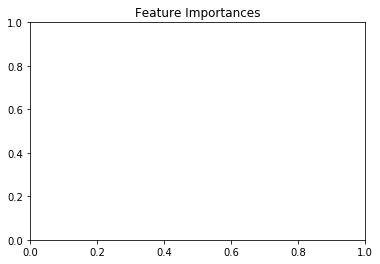

In [253]:
plt.title('Feature Importances')

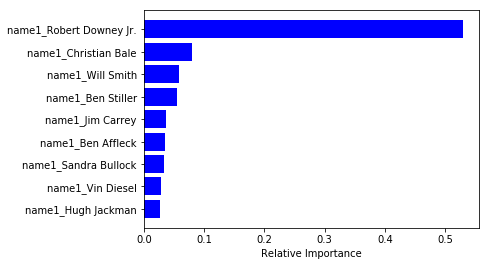

In [254]:
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
#Low Variance Filter
var = mydata_new.var()

In [ ]:
mydata_new = mydata_new.columns

In [ ]:
variable = []

In [ ]:
for i in range(0, len(var)):
    if var[i]>=10:
        variable.append(mydata_new[i+1])

In [ ]:
mydata_new

In [255]:
#2 
mydata_new1 = df[['name2_Aaron Eckhart',
 'name2_Anne Hathaway',
 'name2_Cate Blanchett',
 'name2_Drew Barrymore',
 'name2_Elizabeth Banks',
 'name2_Gerard Butler',
 'name2_Jamie Foxx',
 'name2_Jennifer Aniston',
 'name2_Joel Edgerton',
 'name2_Jude Law',
 'name2_Julianne Moore',
 'name2_Matt Damon',
 'name2_Owen Wilson',
 'name2_Penélope Cruz',
 'name2_Rose Byrne',
 'name2_Samuel L. Jackson']]

In [256]:
mydata_new1

,name2_Aaron Eckhart,name2_Anne Hathaway,name2_Cate Blanchett,name2_Drew Barrymore,name2_Elizabeth Banks,name2_Gerard Butler,name2_Jamie Foxx,name2_Jennifer Aniston,name2_Joel Edgerton,name2_Jude Law,name2_Julianne Moore,name2_Matt Damon,name2_Owen Wilson,name2_Penélope Cruz,name2_Rose Byrne,name2_Samuel L. Jackson
21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
151,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
169,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
174,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [257]:
mydata_new1.corr()

,name2_Aaron Eckhart,name2_Anne Hathaway,name2_Cate Blanchett,name2_Drew Barrymore,name2_Elizabeth Banks,name2_Gerard Butler,name2_Jamie Foxx,name2_Jennifer Aniston,name2_Joel Edgerton,name2_Jude Law,name2_Julianne Moore,name2_Matt Damon,name2_Owen Wilson,name2_Penélope Cruz,name2_Rose Byrne,name2_Samuel L. Jackson
name2_Aaron Eckhart,1.000000,-0.003281,-0.003459,-0.003281,-0.003093,-0.003281,-0.003281,-0.003093,-0.003093,-0.003281,-0.003093,-0.003093,-0.003946,-0.003093,-0.003093,-0.003790
name2_Anne Hathaway,-0.003281,1.000000,-0.003281,-0.003112,-0.002934,-0.003112,-0.003112,-0.002934,-0.002934,-0.003112,-0.002934,-0.002934,-0.003743,-0.002934,-0.002934,-0.003595
name2_Cate Blanchett,-0.003459,-0.003281,1.000000,-0.003281,-0.003093,-0.003281,-0.003281,-0.003093,-0.003093,-0.003281,-0.003093,-0.003093,-0.003946,-0.003093,-0.003093,-0.003790
name2_Drew Barrymore,-0.003281,-0.003112,-0.003281,1.000000,-0.002934,-0.003112,-0.003112,-0.002934,-0.002934,-0.003112,-0.002934,-0.002934,-0.003743,-0.002934,-0.002934,-0.003595
name2_Elizabeth Banks,-0.003093,-0.002934,-0.003093,-0.002934,1.000000,-0.002934,-0.002934,-0.002765,-0.002765,-0.002934,-0.002765,-0.002765,-0.003528,-0.002765,-0.002765,-0.003389
name2_Gerard Butler,-0.003281,-0.003112,-0.003281,-0.003112,-0.002934,1.000000,-0.003112,-0.002934,-0.002934,-0.003112,-0.002934,-0.002934,-0.003743,-0.002934,-0.002934,-0.003595
name2_Jamie Foxx,-0.003281,-0.003112,-0.003281,-0.003112,-0.002934,-0.003112,1.000000,-0.002934,-0.002934,-0.003112,-0.002934,-0.002934,-0.003743,-0.002934,-0.002934,-0.003595
name2_Jennifer Aniston,-0.003093,-0.002934,-0.003093,-0.002934,-0.002765,-0.002934,-0.002934,1.000000,-0.002765,-0.002934,-0.002765,-0.002765,-0.003528,-0.002765,-0.002765,-0.003389
name2_Joel Edgerton,-0.003093,-0.002934,-0.003093,-0.002934,-0.002765,-0.002934,-0.002934,-0.002765,1.000000,-0.002934,-0.002765,-0.002765,-0.003528,-0.002765,-0.002765,-0.003389
name2_Jude Law,-0.003281,-0.003112,-0.003281,-0.003112,-0.002934,-0.003112,-0.003112,-0.002934,-0.002934,1.000000,-0.002934,-0.002934,-0.003743,-0.002934,-0.002934,-0.003595


In [258]:
model_2 = RandomForestRegressor(random_state=1, max_depth=10)
model_2

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [259]:
mydata_new1 = pd.get_dummies(mydata_new1)

In [260]:
model_2.fit(mydata_new1, df.domesticgross)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

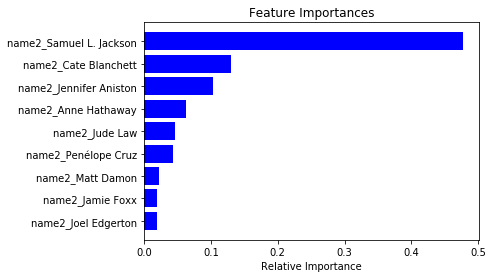

In [261]:
features_2 = mydata_new1.columns
importances_2 = model_2.feature_importances_
indices_2 = np.argsort(importances_2)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices_2)), importances_2[indices_2], color='b', align='center')
plt.yticks(range(len(indices_2)), [features_2[i] for i in indices_2])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
mydata_new1.isnull().sum()/len(mydata_new1)*100

In [ ]:
mydata_new1.var()

In [ ]:
#3 

In [ ]:
mydata_new2 =[['name3_Benjamin Bratt',
 'name3_Catherine Keener',
 'name3_Chris Evans',
 'name3_Dan Fogler',
 'name3_Jennifer Garner',
 'name3_John Goodman',
 'name3_Liam Neeson',
 'name3_Mark Ruffalo',
 'name3_Morgan Freeman',
 'name3_Olivia Wilde',
 'name3_Patricia Clarkson',
 'name3_Rachel McAdams',
 'name3_Rosario Dawson',
 'name3_Scarlett Johansson',
 'name3_Willem Dafoe',
 'name3_Woody Harrelson']]

In [ ]:
mydata_new2